**Определение перспективного тарифа для телеком-компании** <br>



**Описание проекта**<br/>
Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». 
Надо сделать предварительный анализ тарифов на небольшой выборке клиентов. Есть данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Надо проанализировать поведение клиентов и сделать вывод — какой тариф лучше. <br/>


<a name="contents"><br/>
**Содержание**<br/>
[**1. Изучение данных из представленного файла данных**](#chapter_1)<br/>
[**2. Изучение данных конкретных столбцов и предобработка данных**](#chapter_2)<br/>
[**3. Исследовательский анализ данных**](#chapter_3)<br/>
[**4. Проверка гипотез**](#chapter_4)<br/>
[**5. Выводы**](#chapter_5)<br/>

<a name="chapter_1"></a>
## 1. Изучение данных из представленного файла данных

<a name="chapter_1.1"></a>
**1.1. Выставление окружения и импорт библиотек.**

1.1.1. Вначале посмотрим окружение тренажера Яндекс.Практикума с помощью команды ` !conda list -e ` и получаем такой результат по необходимым нам библиотекам:

1.1.2. Смотрим окружение на своей локальной машине:

In [1]:
#!conda list -e

# This file may be used to create an environment using:
# $ conda create --name <env> --file <this file>
# platform: win-64
_ipyw_jlab_nb_ext_conf=0.1.0=py38_0
alabaster=0.7.12=pyhd3eb1b0_0
anaconda=2021.05=py38_0
anaconda-client=1.7.2=py38_0
anaconda-navigator=2.0.3=py38_0
anaconda-project=0.9.1=pyhd3eb1b0_1
anyio=2.2.0=py38haa95532_2
appdirs=1.4.4=py_0
argh=0.26.2=py38_0
argon2-cffi=20.1.0=py38h2bbff1b_1
asn1crypto=1.4.0=py_0
astroid=2.5=py38haa95532_1
astropy=4.2.1=py38h2bbff1b_1
async_generator=1.10=pyhd3eb1b0_0
atomicwrites=1.4.0=py_0
attrs=20.3.0=pyhd3eb1b0_0
autopep8=1.5.6=pyhd3eb1b0_0
babel=2.9.0=pyhd3eb1b0_0
backcall=0.2.0=pyhd3eb1b0_0
backports=1.0=pyhd3eb1b0_2
backports.functools_lru_cache=1.6.4=pyhd3eb1b0_0
backports.shutil_get_terminal_size=1.0.0=pyhd3eb1b0_3
backports.tempfile=1.0=pyhd3eb1b0_1
backports.weakref=1.0.post1=py_1
bcrypt=3.2.0=py38he774522_0
beautifulsoup4=4.9.3=pyha847dfd_0
bitarray=1.9.2=py38h2bbff1b_1
bkcharts=0.2=py38_0
black=19.10b0=py_0
blas=1.0=mkl
blea

1.1.3. Делаем импорт библиотек, используемых в курсе, и сделаем запрос на обновление основной библиотеки.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random

import numpy as np

import math as mt
from math import factorial

import scipy.stats
from scipy.stats import norm
from scipy import stats as st

import seaborn as sns
sns.set(color_codes=True)

import copy #импорт библиотеки по копированию Источник: https://pythononline.ru/osnovy/modul-copy-python

import warnings
warnings.filterwarnings("ignore")

#mt.pi # просто проверил быстро на своей машине, на ней это в первый раз ))
#print(factorial(5))

In [3]:
!pip install pandas -U

1.1.4. Корректируем вывод табличных данных с помощью функции set_option() в Pandas

In [4]:
#pd.set_option('max_rows', 5) # поставим ограничение на вывод 5 строк https://habr.com/ru/post/521894/
pd.set_option('display.max_columns', None) # снимаем ограничение на отображение колонок
pd.set_option('display.float_format', '{:.2f}'.format) # ставим ограничение на количество выводимых знаков у float 

**1.2. Импортируем основной файл данных локально и применяем кострукцию except для тренажера**

In [5]:
try:
    users_data = pd.read_csv('C:/1_Webartel/2021/pithon_work/datasets/users.csv') # разделители у нас запятые, можно не применять sep='\t'
except FileNotFoundError as e:                                      
    users_data = pd.read_csv('/datasets/users.csv')
try:
    calls_data = pd.read_csv('C:/1_Webartel/2021/pithon_work/datasets/calls.csv') # разделители у нас запятые, можно не применять sep='\t'
except FileNotFoundError as e:                                      
    calls_data = pd.read_csv('/datasets/calls.csv') 
try:
    messages_data = pd.read_csv('C:/1_Webartel/2021/pithon_work/datasets/messages.csv')
except FileNotFoundError as e:                                      
    messages_data = pd.read_csv('/datasets/messages.csv')
try:
    internet_data = pd.read_csv('C:/1_Webartel/2021/pithon_work/datasets/internet.csv')
except FileNotFoundError as e:                                      
    internet_data = pd.read_csv('/datasets/internet.csv')
try:
    tariffs_data = pd.read_csv('C:/1_Webartel/2021/pithon_work/datasets/tariffs.csv')
except FileNotFoundError as e:                                      
    tariffs_data = pd.read_csv('/datasets/tariffs.csv')



1.2.1.Отсмотрим последовательно все датасеты

In [6]:
users_data.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [7]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
display(users_data.columns) # названия столбцов нашего файла

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

In [9]:
users_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,500.00,NaN,NaN,NaN,1249.50,144.48,1000.00,1124.75,1249.50,1374.25,1499.00
age,500.00,NaN,NaN,NaN,46.59,16.67,18.00,32.00,46.00,62.00,75.00
churn_date,38,33,2018-12-03,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,500,76,Москва,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_name,500,246,Радим,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_name,500,419,Андреенко,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reg_date,500,270,2018-05-28,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tariff,500,2,smart,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
users_data.describe(include=[object]).T # полезное отображение https://mlbootcamp.ru/ru/article/tutorial/ или  include =['object', 'float', 'int'] http://espressocode.top/python-pandas-dataframe-describe-method/

,count,unique,top,freq
churn_date,38,33,2018-12-03,2
city,500,76,Москва,99
first_name,500,246,Радим,6
last_name,500,419,Андреенко,5
reg_date,500,270,2018-05-28,8
tariff,500,2,smart,351


In [11]:
users_data.describe(include=[int, float]).T # тоже надо бы запомнить, полезное отображение

,count,mean,std,min,25%,50%,75%,max
user_id,500.00,1249.50,144.48,1000.00,1124.75,1249.50,1374.25,1499.00
age,500.00,46.59,16.67,18.00,32.00,46.00,62.00,75.00


In [12]:
users_data.loc[users_data.duplicated(keep=False)].sort_values('user_id') # keep='False' смотрим повторы
#http://espressocode.top/python-pandas-dataframe-duplicated/ https://zen.yandex.ru/media/id/5ee6f73b7c

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff


In [13]:
users_data.isnull().sum() # сразу посмотрим картину по пропускам данных по всем столбцам

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Проблема с reg_date и churn_date - перевести в datetime64;<br/>
Обратить внимание на churn_date, всего 38 объектов - особенно при возможном объединении таблиц.


In [14]:
calls_data.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [15]:
#for data in [calls_data, internet_data, messages_data, users_data, tariffs_data]: print(data.info(), end='\n\n') # положим здесь на будущее
calls_data.info() # смотрим общую информацию о файле и его структуре

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [16]:
display(calls_data.columns) # названия столбцов нашего файла

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

In [17]:
calls_data.describe(include='all').T # .T - транспонированный формат, 
# include='all' - включить все колонки, описание функции https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,202607,202607,1000_0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
call_date,202607,365,2018-12-31,1435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,202607.00,NaN,NaN,NaN,6.76,5.84,0.00,1.30,6.00,10.70,38.00
user_id,202607.00,NaN,NaN,NaN,1253.94,144.72,1000.00,1126.00,1260.00,1379.00,1499.00


In [18]:
calls_data.loc[calls_data.duplicated(keep=False)].sort_values('user_id') # keep='False' смотрим повторы
#http://espressocode.top/python-pandas-dataframe-duplicated/ https://zen.yandex.ru/media/id/5ee6f73b7c

,id,call_date,duration,user_id


In [19]:
calls_data['duration'].value_counts(dropna=False) # сразу посмотрим на звонки с нулевой длительностью, «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
26.94        1
32.19        1
26.32        1
27.41        1
26.90        1
Name: duration, Length: 2871, dtype: int64

Интересно, что за разговоры длительностью 0 секунд? <br/>
Проблема только с call_date - перевести в datetime64, дубликатов нет.

In [20]:
messages_data.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [21]:
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [22]:
display(messages_data.columns) # названия столбцов нашего файла

Index(['id', 'message_date', 'user_id'], dtype='object')

In [23]:
messages_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,123036,123036,1000_0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
message_date,123036,364,2018-12-31,859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,123036.00,NaN,NaN,NaN,1256.99,143.52,1000.00,1134.00,1271.00,1381.00,1499.00


In [24]:
messages_data.loc[messages_data.duplicated(keep=False)].sort_values('user_id') # keep='False' смотрим повторы
#http://espressocode.top/python-pandas-dataframe-duplicated/ https://zen.yandex.ru/media/id/5ee6f73b7c

,id,message_date,user_id


Проблема только с message_date - перевести в datetime64

In [25]:
internet_data.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [26]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [27]:
display(internet_data.columns) # названия столбцов нашего файла

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

Лишний разделитель оказался в строке столбцов, можно убрать для красоты процесса

In [28]:
internet_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396.00,NaN,NaN,NaN,74697.50,43127.05,0.00,37348.75,74697.50,112046.25,149395.00
id,149396,149396,1000_0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mb_used,149396.00,NaN,NaN,NaN,370.19,278.30,0.00,138.19,348.01,559.55,1724.83
session_date,149396,365,2018-12-31,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,149396.00,NaN,NaN,NaN,1252.10,144.05,1000.00,1130.00,1251.00,1380.00,1499.00


In [29]:
internet_data.loc[internet_data.duplicated(keep=False)].sort_values('user_id') # keep='False' смотрим повторы
#http://espressocode.top/python-pandas-dataframe-duplicated/ https://zen.yandex.ru/media/id/5ee6f73b7c

,Unnamed: 0,id,mb_used,session_date,user_id


Проблема только с session_date - перевести в datetime64

In [30]:
internet_data['mb_used'].value_counts(dropna=False)

0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
          ...  
643.43        1
973.04        1
834.51        1
777.30        1
23.72         1
Name: mb_used, Length: 70003, dtype: int64

In [31]:
tariffs_data.head(5)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [32]:
tariffs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [33]:
display(tariffs_data.columns) # названия столбцов нашего файла

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

In [34]:
tariffs_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
messages_included,2.00,NaN,NaN,NaN,525.00,671.75,50.00,287.50,525.00,762.50,1000.00
mb_per_month_included,2.00,NaN,NaN,NaN,23040.00,10861.16,15360.00,19200.00,23040.00,26880.00,30720.00
minutes_included,2.00,NaN,NaN,NaN,1750.00,1767.77,500.00,1125.00,1750.00,2375.00,3000.00
rub_monthly_fee,2.00,NaN,NaN,NaN,1250.00,989.95,550.00,900.00,1250.00,1600.00,1950.00
rub_per_gb,2.00,NaN,NaN,NaN,175.00,35.36,150.00,162.50,175.00,187.50,200.00
rub_per_message,2.00,NaN,NaN,NaN,2.00,1.41,1.00,1.50,2.00,2.50,3.00
rub_per_minute,2.00,NaN,NaN,NaN,2.00,1.41,1.00,1.50,2.00,2.50,3.00
tariff_name,2,2,smart,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 **1.2.2.Описание данных, начальное.**

In [35]:
for data in [users_data, calls_data, messages_data, internet_data, tariffs_data]: print(data.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

<class 'pandas.

<b>Таблица users (информация о пользователях):</b>

user_id — уникальный идентификатор пользователя, int64, посмотреть на уникальность

first_name — имя пользователя

last_name — фамилия пользователя, посмотреть на уникальность

age — возраст пользователя (годы), посмотреть распределение

reg_date — дата подключения тарифа (день, месяц, год), посмотреть распределение, перевести в datetime64

churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных), посмотреть распределение, перевести в datetime64. Обратить внимание на churn_date, всего 38 объектов - особенно при возможном объединении таблиц

city — город проживания пользователя, проверить на уникальность названий и артефакты

tarif — название тарифного плана, посмотреть распределение, проверить на уникальность названий

<b>Таблица calls (информация о звонках):</b>

id — уникальный номер звонка, object, проверить на уникальность

call_date — дата звонка, посмотреть распределение, перевести в datetime64

duration — длительность звонка в минутах, посмотреть распределение

user_id — идентификатор пользователя, int64, сделавшего звонок, проверить на уникальность

<b>Таблица messages (информация о сообщениях):</b>

id — уникальный номер сообщения, object, проверить на уникальность

message_date — дата сообщения, посмотреть распределение, перевести в datetime64

user_id — идентификатор пользователя, int64, отправившего сообщение, проверить на уникальность

<b>Таблица internet (информация об интернет-сессиях):</b>

id — уникальный номер сессии, object, проверить на уникальность

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах), посмотреть распределение

session_date — дата интернет-сессии, посмотреть распределение, перевести в datetime64

user_id — идентификатор пользователя, int64, проверить на уникальность

<b>Таблица tariffs (информация о тарифах):</b>

tariff_name — название тарифа

rub_monthly_fee — ежемесячная абонентская плата в рублях

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**1.3. Краткие выводы по структуре:**
    
- Всего 5 таблиц. Разделители - `,` и одна ощибка с разделителями в таблице internet.csv, что вызвало появление столбца Unnamed: 0. Остальные названия столбцов без пропусков и артефактов.

- Дублирующих строк нет.

- Есть пропуски данных в таблице users.csv столбец churn_date, носят технологический характер.

- Некорректных дат не замечено, значимых выбросов тоже не видно пока.

- все столбцы с датами надо бы перевести тип данных, более подходящий для работы с временными данными.

<a name="chapter_2"></a>
## 2. Изучение данных конкретных столбцов и предобработка данных

**2.1. Таблица users.csv**

In [36]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [37]:
users_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,500.00,NaN,NaN,NaN,1249.50,144.48,1000.00,1124.75,1249.50,1374.25,1499.00
age,500.00,NaN,NaN,NaN,46.59,16.67,18.00,32.00,46.00,62.00,75.00
churn_date,38,33,2018-12-03,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,500,76,Москва,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_name,500,246,Радим,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_name,500,419,Андреенко,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reg_date,500,270,2018-05-28,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tariff,500,2,smart,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
users_data['user_id'].value_counts(dropna=False) # ставим значение False для параметра dropna, чтобы учесть возможные NaN

1000    1
1329    1
1342    1
1341    1
1340    1
       ..
1161    1
1160    1
1159    1
1158    1
1499    1
Name: user_id, Length: 500, dtype: int64

In [39]:
users_data['age'].value_counts(dropna=False)

53    14
42    14
63    13
64    13
71    13
73    12
21    12
40    12
37    11
29    11
39    11
26    11
47    11
70    10
45    10
41    10
52    10
58    10
36    10
66     9
23     9
50     9
65     9
19     9
48     9
24     9
68     9
27     9
28     9
51     9
20     9
56     9
30     9
60     8
44     8
69     8
62     8
55     8
74     7
25     7
46     7
35     7
32     7
67     7
43     7
31     7
18     6
75     6
54     6
59     6
72     5
22     5
34     5
33     5
38     5
49     4
57     4
61     3
Name: age, dtype: int64

Text(0.5, 1.0, 'Распределение по возрасту')

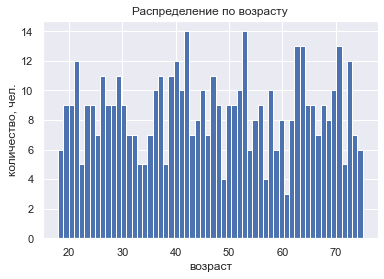

In [40]:
users_data['age'].hist(bins=58, range = (18, 75))
plt.xlabel('возраст')
plt.ylabel('количество, чел.')
plt.title('Распределение по возрасту')

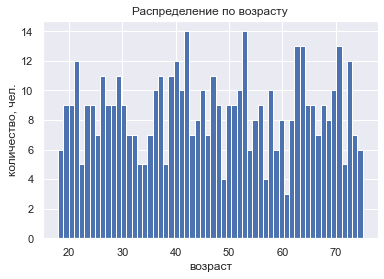

In [41]:
users_data['age'].hist(bins=58, range = (18, 75))
plt.xlabel('возраст')
plt.ylabel('количество, чел.')
plt.title('Распределение по возрасту');

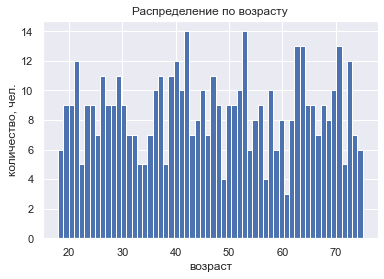

In [42]:
users_data['age'].hist(bins=58, range = (18, 75))
plt.xlabel('возраст')
plt.ylabel('количество, чел.')
plt.title('Распределение по возрасту')
plt.show()

Приведем столбцы с датами к формату datetime64

In [43]:
users_data['churn_date'] = pd.to_datetime(users_data['churn_date'], format='%Y-%m-%d')
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'], format='%Y-%m-%d')
users_data.info() # проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [44]:
users_data['churn_date'].value_counts(dropna=False) # посмотрим даты на события одновременные

NaT           462
2018-12-21      2
2018-10-03      2
2018-10-14      2
2018-12-09      2
2018-12-03      2
2018-10-27      1
2018-10-28      1
2018-11-26      1
2018-11-27      1
2018-11-16      1
2018-09-27      1
2018-12-30      1
2018-11-13      1
2018-12-25      1
2018-12-14      1
2018-12-24      1
2018-09-26      1
2018-11-22      1
2018-08-17      1
2018-10-04      1
2018-09-02      1
2018-10-05      1
2018-11-30      1
2018-12-20      1
2018-12-16      1
2018-11-07      1
2018-12-23      1
2018-08-31      1
2018-12-26      1
2018-12-11      1
2018-11-21      1
2018-12-18      1
2018-10-25      1
Name: churn_date, dtype: int64

In [45]:
users_data['reg_date'].value_counts(dropna=False)


2018-05-28    8
2018-11-16    5
2018-10-05    5
2018-04-03    5
2018-01-04    5
             ..
2018-09-20    1
2018-04-28    1
2018-08-07    1
2018-06-18    1
2018-04-25    1
Name: reg_date, Length: 270, dtype: int64

In [46]:
users_data[['reg_date']].describe(datetime_is_numeric = True) # жаль, что не будет такой возможности в будущем.
# datetime_is_numeric = True - для отключения предупреждения

,reg_date
count,500
mean,2018-06-30 18:57:35.999999744
min,2018-01-01 00:00:00
25%,2018-04-07 12:00:00
50%,2018-07-02 12:00:00
75%,2018-09-29 00:00:00
max,2018-12-31 00:00:00


In [47]:
users_data[['reg_date']].describe() 

,reg_date
count,500
unique,270
top,2018-05-28 00:00:00
freq,8
first,2018-01-01 00:00:00
last,2018-12-31 00:00:00


Получается, смотрим ровно календарный год 2018 по дате регистрации клиентов

In [48]:
users_data['city'].value_counts(dropna=False) # ставим значение False для параметра dropna, чтобы учесть возможные NaN

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Архангельск         1
Иваново             1
Нижневартовск       1
Химки               1
Подольск            1
Name: city, Length: 76, dtype: int64

Города-миллионники впереди, что соответствует...

In [49]:
users_data['city'].unique().tolist() # нет проблем с названиями городов

['Краснодар',
 'Москва',
 'Стерлитамак',
 'Новокузнецк',
 'Набережные Челны',
 'Ульяновск',
 'Челябинск',
 'Пермь',
 'Тюмень',
 'Самара',
 'Санкт-Петербург',
 'Иваново',
 'Чебоксары',
 'Омск',
 'Уфа',
 'Томск',
 'Чита',
 'Мурманск',
 'Петрозаводск',
 'Тверь',
 'Екатеринбург',
 'Махачкала',
 'Вологда',
 'Череповец',
 'Ярославль',
 'Сочи',
 'Хабаровск',
 'Ставрополь',
 'Рязань',
 'Улан-Удэ',
 'Тула',
 'Саратов',
 'Ростов-на-Дону',
 'Казань',
 'Иркутск',
 'Курск',
 'Калуга',
 'Якутск',
 'Астрахань',
 'Химки',
 'Владикавказ',
 'Волгоград',
 'Саранск',
 'Ижевск',
 'Новосибирск',
 'Брянск',
 'Тольятти',
 'Нижний Тагил',
 'Орёл',
 'Белгород',
 'Воронеж',
 'Волжский',
 'Курган',
 'Барнаул',
 'Красноярск',
 'Архангельск',
 'Липецк',
 'Кемерово',
 'Киров',
 'Сургут',
 'Пенза',
 'Магнитогорск',
 'Нижний Новгород',
 'Кострома',
 'Владивосток',
 'Тамбов',
 'Балашиха',
 'Севастополь',
 'Калининград',
 'Оренбург',
 'Смоленск',
 'Нижневартовск',
 'Владимир',
 'Новороссийск',
 'Грозный',
 'Подольск']

Посмотрим, как тарифы распределились

In [50]:
users_data['tariff'].value_counts(dropna=False)

smart    351
ultra    149
Name: tariff, dtype: int64

Есть желание добавить столбец users_month и далее посмотреть, как набирались люди с разными тарифами

In [51]:
users_data['users_month'] = users_data['reg_date'].dt.month
#users_data.info() # проверим сразу

In [52]:
users_data_stat = users_data.groupby('users_month').agg(
    new_users_count=('tariff','count'))
users_data_stat = users_data_stat.sort_values('users_month', ascending = True)
display(users_data_stat)
# да, новые клиенты добавляются примерно одним темпом
# хотелось бы понять, как вывести одновременно количество smart и ultra по каждому месяцу.
# но пока вижу способ только через формирование новой таблицы, как в предыдущем самостоятельном проекте
# а было бы здорово через два условия в .groupby - возможно?

,new_users_count
users_month,
1,43
2,39
3,32
4,53
5,41
6,40
7,44
8,50
9,35


Посмотрим все-таки по разным тарифам и подумаем потом, как совместить это далее в одной таблице

In [53]:
users_data_stat_ultra = users_data.loc[users_data['tariff'] == 'ultra'].groupby('users_month').agg(
    new_users_count_ultra=('tariff','count'))
users_data_stat_ultra = users_data_stat_ultra.sort_values('users_month', ascending = True)
display(users_data_stat_ultra)

,new_users_count_ultra
users_month,
1,9
2,15
3,13
4,18
5,12
6,17
7,7
8,16
9,9


In [54]:
users_data_stat_smart = users_data.loc[users_data['tariff'] == 'smart'].groupby('users_month').agg(
    new_users_count_smart=('tariff','count'))
users_data_stat_smart = users_data_stat_smart.sort_values('users_month', ascending = True)
display(users_data_stat_smart)

,new_users_count_smart
users_month,
1,34
2,24
3,19
4,35
5,29
6,23
7,37
8,34
9,26


Оба тарифа выдают примерно одинаковый по месяцам поток новых клиентов и у smart клиентов более, чем в два раза выше.

Text(0.5, 1.0, 'Появление новых клиентов')

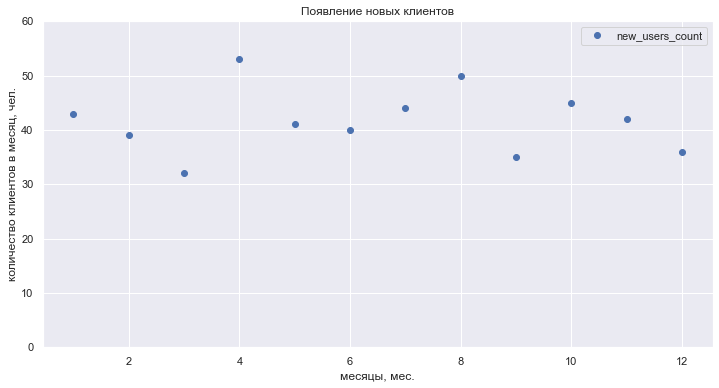

In [55]:
users_data_stat.plot(y='new_users_count', style='o', ylim=(0, 60), grid=True, figsize=(12, 6))
plt.xlabel('месяцы, мес.')
plt.ylabel('количество клиентов в месяц, чел.')
plt.title('Появление новых клиентов')

Да, приблизительно похожие темпы прироста клиентской базы по каждому месяцу

<a name="chapter_12"></a><br/>
**2.2. Таблица calls.csv**

In [56]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [57]:
calls_data['call_date'].value_counts(dropna=False)

2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64

Странноватое распределение звонков, после Нового года особо живых нет? Приведем даты к datetime64 и проверим распределение количества звонков по датам

In [58]:
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d')
calls_data.info() # проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


Text(0.5, 1.0, 'Распределение звонков по дате')

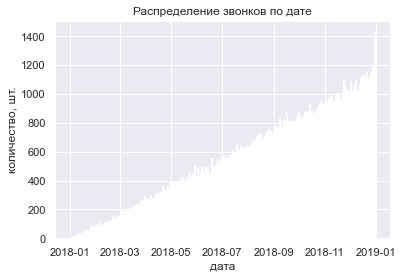

In [59]:
calls_data['call_date'].hist(bins=365)
plt.xlabel('дата')
plt.ylabel('количество, шт.')
plt.title('Распределение звонков по дате')

Что-то совсем нереальное распределение звонков по датам... Если только мы не берем только новые регистрации новых клиентов с начала года и далее только их и учитываем до конца года. И даже при этой версии распределение чересчур линейное получается. Но давайте пойдем снова вверх и посмотрим, как появляются новые клиенты. Как выяснилось вверху - достаточно равномерно, не противоречит особо этой картине. 

Выброс в предновогодний день даже меньше, чем я предполагал.

In [60]:
calls_data['user_id'].value_counts(dropna=False) # это же тоже распределение звонков по юзерам

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

Text(0.5, 1.0, 'Распределение количества звонков по юзерам')

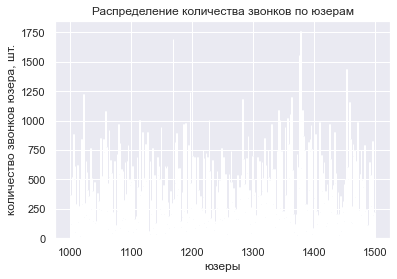

In [61]:
calls_data['user_id'].hist(bins=500)
plt.xlabel('юзеры')
plt.ylabel('количество звонков юзера, шт.')
plt.title('Распределение количества звонков по юзерам')

In [62]:
calls_data['duration'].value_counts(dropna=False)

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
26.94        1
32.19        1
26.32        1
27.41        1
26.90        1
Name: duration, Length: 2871, dtype: int64

Text(0.5, 1.0, 'Распределение длительности разговоров')

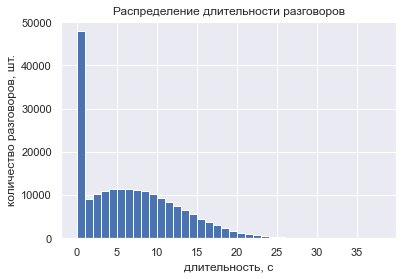

In [63]:
calls_data['duration'].hist(bins=38)
plt.xlabel('длительность, с')
plt.ylabel('количество разговоров, шт.')
plt.title('Распределение длительности разговоров')

Посмотрим отдельно звонки с нулевой длительностью

Text(0.5, 1.0, 'Распределение количества  разговоров нулевой дительности')

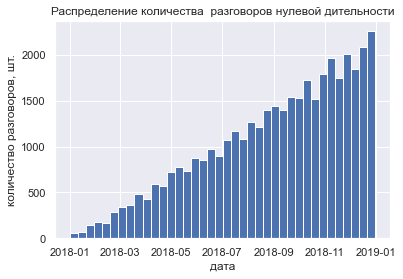

In [64]:
null_calls = calls_data.query('duration == 0')
null_calls['call_date'].hist(bins=38)
plt.xlabel('дата')
plt.ylabel('количество разговоров, шт.')
plt.title('Распределение количества  разговоров нулевой дительности')

Вполне равномерно, согласно роста клиентской базы.

Пока мне не совсем понятно, что делать с длительность звонков в 0 минут. Остальные надо округлить в верхнюю сторону.

Стоп, в задании есть о нулевой длительности - "В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять."

Считаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам. <br/>
Для этого вводим новый столбец calls_month, позже пришлось переиграть на month

In [65]:
calls_data['month'] = calls_data['call_date'].dt.month
calls_data.info() # проверим сразу

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


In [66]:
calls_data.head(5)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


И сразу округляем в верхнюю сторону и  переводим в int 

In [67]:
#calls_data['duration'] = calls_data['duration'].apply(np.ceil).astype('int') # округляем вверх, а вниз np.floo
calls_data['duration'] = np.ceil(calls_data['duration']).astype('int')
calls_data.head(10) # проверим сразу
#id 	call_date 	duration 	user_id 	month
#0 	1000_0 	2018-07-25 	0 	1000 	7
#1 	1000_1 	2018-08-17 	0 	1000 	8
#2 	1000_2 	2018-06-11 	3 	1000 	6
#3 	1000_3 	2018-09-21 	14 	1000 	9
#4 	1000_4 	2018-12-15 	6 	1000 	12
#5 	1000_5 	2018-11-02 	0 	1000 	11
#6 	1000_6 	2018-10-18 	0 	1000 	10
#7 	1000_7 	2018-08-22 	19 	1000 	8
#8 	1000_8 	2018-09-15 	19 	1000 	9
#9 	1000_9 	2018-08-15 	0 	1000 	8

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
5,1000_5,2018-11-02,0,1000,11
6,1000_6,2018-10-18,0,1000,10
7,1000_7,2018-08-22,19,1000,8
8,1000_8,2018-09-15,19,1000,9
9,1000_9,2018-08-15,0,1000,8


Округление прошло штатно

Посмотрим общее количество звонков по количеству и по сумме минут

In [68]:
calls_data_user_stat_month = calls_data.groupby('month').agg(calls_count_user_month=('duration','count'), calls_sum_user_month=('duration','sum'))
calls_data_user_stat_month = calls_data_user_stat_month.sort_values('month', ascending = True)
display(calls_data_user_stat_month)



,calls_count_user_month,calls_sum_user_month
month,,
1,1476,10784
2,3328,24455
3,6687,48151
4,9272,66310
5,12647,88810
6,14716,105180
7,18298,131746
8,21488,153698
9,24061,173475


И сейчас наконец-то считаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам. И обновим индекс, чтобы потом было удобно объединить данные.

In [69]:
calls_data_id_stat_month = calls_data.groupby(['user_id', 
                                               'month']).agg(calls_count_id_month=('id','count'),
                                                                   calls_sum_id_month=('duration','sum')).reset_index()
calls_data_id_stat_month = calls_data_id_stat_month.sort_values('user_id', ascending = True)
display(calls_data_id_stat_month)

,user_id,month,calls_count_id_month,calls_sum_id_month
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3168,1498,9,59,471
3171,1499,10,68,449
3172,1499,11,74,612
3170,1499,9,9,70


**2.3. Таблица messages.csv**

In [70]:
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [71]:
messages_data.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [72]:
messages_data['message_date'].value_counts(dropna=False) # картина, похожая на звонки

2018-12-31    859
2018-12-30    765
2018-12-21    712
2018-12-29    702
2018-12-28    699
             ... 
2018-01-11     12
2018-01-05     10
2018-01-04     10
2018-01-02     10
2018-01-03      4
Name: message_date, Length: 364, dtype: int64

In [73]:
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%d')
messages_data.info() # проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Text(0.5, 1.0, 'Распределение количества сообщений по дням')

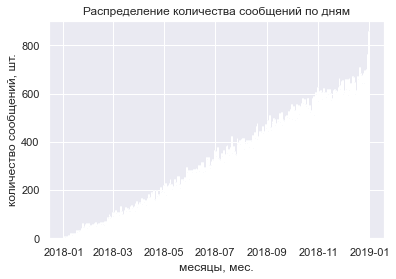

In [74]:
messages_data['message_date'].hist(bins=364)
plt.xlabel('месяцы, мес.')
plt.ylabel('количество сообщений, шт.')
plt.title('Распределение количества сообщений по дням')

Text(0.5, 1.0, 'Распределение количества сообщений по юзерам')

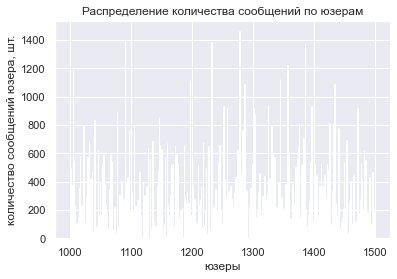

In [75]:
messages_data['user_id'].hist(bins=500)
plt.xlabel('юзеры')
plt.ylabel('количество сообщений юзера, шт.')
plt.title('Распределение количества сообщений по юзерам')

Все очень похоже на звонки. Ну и далее вводим колонку месяца и считаем все также, как и для звонков.

In [76]:
messages_data['month'] = messages_data['message_date'].dt.month
messages_data.info() # проверим сразу

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


Это общее количество сообщений по месяцам

In [77]:
messages_data_user_stat_month = messages_data.groupby('month').agg(messages_count_user_month=('message_date','count'))
messages_data_user_stat_month = messages_data_user_stat_month.sort_values('month', ascending = True)
display(messages_data_user_stat_month)

,messages_count_user_month
month,
1,924
2,1924
3,3648
4,5179
5,7298
6,8983
7,11320
8,13088
9,14759


А это общее количество сообщений по каждому клиенту по месяцам.

In [78]:
messages_data_id_stat_month = messages_data.groupby(['user_id', 
                                               'month']).agg(messages_count_id_month=('id','count')).reset_index()
messages_data_id_stat_month = messages_data_id_stat_month.sort_values('user_id', ascending = True)
display(messages_data_id_stat_month)

,user_id,month,messages_count_id_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2715,1499,11,59
2713,1499,9,11
2714,1499,10,48


<a name="chapter_11"></a><br/>
**2.4. Таблица internet.csv**


In [79]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [80]:
internet_data.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [81]:
internet_data.drop(['Unnamed: 0'], axis=1, inplace = True) # удалим столбец
internet_data.info() # сразу и проверим


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [82]:
internet_data.head(5)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [83]:
internet_data['mb_used'].value_counts(dropna=False) # картина, похожая на длительность звонков

0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
          ...  
643.43        1
973.04        1
834.51        1
777.30        1
23.72         1
Name: mb_used, Length: 70003, dtype: int64

In [84]:
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d')
internet_data.info() # проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


Text(0.5, 1.0, 'Распределение количества сессий по дням')

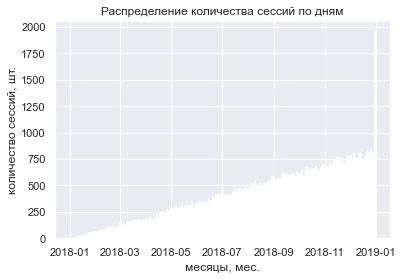

In [85]:
internet_data['session_date'].hist(bins=364)
plt.xlabel('месяцы, мес.')
plt.ylabel('количество сессий, шт.')
plt.title('Распределение количества сессий по дням')

Text(0.5, 1.0, 'Распределение количества сессий по юзерам')

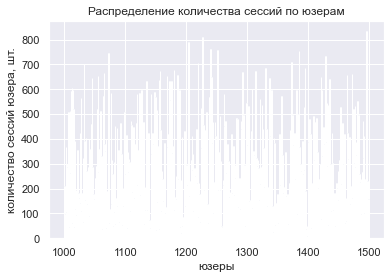

In [86]:
internet_data['user_id'].hist(bins=500)
plt.xlabel('юзеры')
plt.ylabel('количество сессий юзера, шт.')
plt.title('Распределение количества сессий по юзерам')

In [87]:
internet_data['month'] = internet_data['session_date'].dt.month
internet_data.info() # проверим сразу

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
 4   month         149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [88]:
internet_data.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,149396,149396,1000_0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mb_used,149396.00,NaN,NaN,NaN,370.19,0.00,138.19,348.01,559.55,1724.83,278.30
session_date,149396,NaN,NaN,NaN,2018-09-02 12:55:35.221826560,2018-01-01 00:00:00,2018-07-05 00:00:00,2018-09-17 00:00:00,2018-11-14 00:00:00,2018-12-31 00:00:00,NaN
user_id,149396.00,NaN,NaN,NaN,1252.10,1000.00,1130.00,1251.00,1380.00,1499.00,144.05
month,149396.00,NaN,NaN,NaN,8.56,1.00,7.00,9.00,11.00,12.00,2.79


Text(0.5, 1.0, 'Распределение количества mb по сессиям')

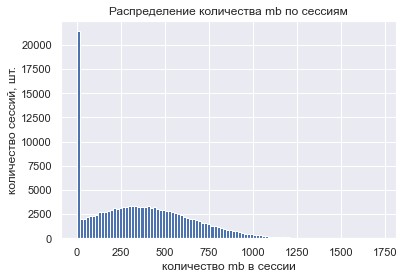

In [89]:
internet_data['mb_used'].hist(bins=100)
plt.xlabel('количество mb в сессии')
plt.ylabel('количество сессий, шт.')
plt.title('Распределение количества mb по сессиям')

Тоже много сессий с нулевым количеством трафика. Это может свидетельствовать о технических проблемах оператора

Это общее количество сессий и трафика по месяцам

In [90]:
internet_data_user_stat_month = internet_data.groupby('month').agg(internet_session_count_user_month=
                                                                            ('session_date','count'), 
                                                                            internet_mb_used_sum_id_month=('mb_used','sum'))
internet_data_user_stat_month = internet_data_user_stat_month.sort_values('month', ascending = True)
display(internet_data_user_stat_month)

,internet_session_count_user_month,internet_mb_used_sum_id_month
month,,
1,1117,407732.53
2,2641,955251.65
3,4885,1811835.61
4,6511,2433311.62
5,9408,3525862.24
6,11057,4180017.17
7,13548,5029478.75
8,16092,5998157.07
9,17512,6447422.36


А это общее количество сессий и трафика по каждому клиенту по месяцам. Трафик пересчитан в Гб с округлением вверх.

In [91]:
internet_data_id_stat_month = internet_data.groupby(['user_id', 
                                               'month']).agg(internet_count_id_month = ('id','count'), 
                                                                     internet_sum_id_month=('mb_used','sum')).reset_index()
internet_data_id_stat_month = internet_data_id_stat_month.sort_values('user_id', ascending = True)
internet_data_id_stat_month['internet_sum_id_month'] = internet_data_id_stat_month['internet_sum_id_month'] / 1024
internet_data_id_stat_month['internet_sum_id_month'] = internet_data_id_stat_month['internet_sum_id_month'].apply(np.ceil).astype('int') # округляем вверх и переводим в int 
#internet_data_id_stat_month.head(10)
display(internet_data_id_stat_month)
#display(internet_data_id_stat_month)
#internet_count_id_month 	internet_sum_id_month
#user_id 	internet_month 		
#1000 	5 	5 	2253.49
#6 	49 	23233.77
#7 	29 	14003.64
#8 	29 	14055.93
#9 	27 	14568.91

#internet_count_id_month 	internet_sum_id_month
#user_id 	internet_month 		
#1000 	5 	5 	2.20
#6 	49 	22.69
#7 	29 	13.68
#8 	29 	13.73
#9 	27 	14.23

,user_id,month,internet_count_id_month,internet_sum_id_month
0,1000,5,5,3
1,1000,6,49,23
2,1000,7,29,14
3,1000,8,29,14
4,1000,9,27,15
...,...,...,...,...
3198,1498,10,59,21
3201,1499,11,49,18
3199,1499,9,5,2
3200,1499,10,58,18


**2.5. Помесячная выручка с каждого пользователя** <br/>
Надо посчитать помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Погорячился я с разным обозначением месяцев, приведем их к одному названию.

In [92]:
users_data.head(5)


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,users_month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


In [93]:
calls_data_id_stat_month.tail(60)

,user_id,month,calls_count_id_month,calls_sum_id_month
3119,1490,9,44,322
3122,1490,12,42,290
3120,1490,10,42,312
3118,1490,8,45,346
3121,1490,11,38,282
3116,1490,6,48,330
3115,1490,5,56,339
3114,1490,4,38,270
3117,1490,7,34,250
3131,1491,12,90,674


In [94]:
data_all_paid_1 = users_data.merge(calls_data_id_stat_month, on=['user_id'], how = 'outer')
data_all_paid_1.sort_values('user_id', ascending = True)
display(data_all_paid_1)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,users_month,month,calls_count_id_month,calls_sum_id_month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,5.00,22.00,159.00
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,6.00,43.00,172.00
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,7.00,47.00,340.00
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,8.00,52.00,408.00
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,9.00,58.00,466.00
...,...,...,...,...,...,...,...,...,...,...,...,...
3177,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,9.00,59.00,471.00
3178,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,10.00,68.00,449.00
3179,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,11.00,74.00,612.00
3180,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,9.00,9.00,70.00


In [95]:
#data_all_paid = users_data.merge(calls_data_id_stat_month, on=['user_id','month'], how = 'outer')
#data_all_paid = users_data.merge(calls_data_id_stat_month, on=['user_id'], how = 'outer')
data_all_paid_2 = data_all_paid_1.merge(messages_data_id_stat_month, left_on=['user_id','month'], right_on=['user_id','month'], how = 'outer')
data_all_paid_2 = data_all_paid_2.merge(internet_data_id_stat_month, left_on=['user_id','month'], right_on=['user_id','month'], how = 'outer')

data_all_paid_2.sort_values('user_id', ascending = True)
display(data_all_paid_2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,users_month,month,calls_count_id_month,calls_sum_id_month,messages_count_id_month,internet_count_id_month,internet_sum_id_month
0,1000,52.00,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.00,5.00,22.00,159.00,22.00,5.00,3.00
1,1000,52.00,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.00,6.00,43.00,172.00,60.00,49.00,23.00
2,1000,52.00,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.00,7.00,47.00,340.00,75.00,29.00,14.00
3,1000,52.00,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.00,8.00,52.00,408.00,81.00,29.00,14.00
4,1000,52.00,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.00,9.00,58.00,466.00,57.00,27.00,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,1489,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,9.00,NaN,NaN,32.00,63.00,17.00
3218,1489,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,10.00,NaN,NaN,21.00,63.00,20.00
3219,1489,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,11.00,NaN,NaN,20.00,55.00,18.00
3220,1489,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,12.00,NaN,NaN,35.00,51.00,17.00


In [96]:
data_all_paid_2.tail(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,users_month,month,calls_count_id_month,calls_sum_id_month,messages_count_id_month,internet_count_id_month,internet_sum_id_month
3212,1473,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,9.00,NaN,NaN,19.00,34.00,17.00
3213,1473,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,10.00,NaN,NaN,20.00,32.00,14.00
3214,1473,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,11.00,NaN,NaN,14.00,41.00,22.00
3215,1473,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,12.00,NaN,NaN,20.00,31.00,18.00
3216,1489,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,8.00,NaN,NaN,17.00,34.00,11.00
3217,1489,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,9.00,NaN,NaN,32.00,63.00,17.00
3218,1489,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,10.00,NaN,NaN,21.00,63.00,20.00
3219,1489,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,11.00,NaN,NaN,20.00,55.00,18.00
3220,1489,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,12.00,NaN,NaN,35.00,51.00,17.00
3221,1476,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,4.00,NaN,NaN,NaN,1.00,1.00


Что-то меня смущают результаты объединения. Давайте мы посмотрим эти строки с NaN  по users_id

In [97]:
users_data_number = users_data.query('user_id == 1091 | user_id == 1106 | user_id == 1231 | user_id == 1328 | user_id == 1373 | user_id == 1473 | user_id == 1489 | user_id == 1476')
display(users_data_number.head(60))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,users_month
91,1091,36,NaT,Набережные Челны,Вера,Суслова,2018-05-08,ultra,5
106,1106,67,NaT,Калуга,Исаак,Костин,2018-04-26,ultra,4
231,1231,63,NaT,Чебоксары,Касьян,Авдюков,2018-05-23,ultra,5
328,1328,44,NaT,Мурманск,Рауль,Аркадьев,2018-10-16,ultra,10
373,1373,34,NaT,Улан-Удэ,Нелли,Афанасенко,2018-01-17,smart,1
473,1473,18,NaT,Красноярск,Николай,Лебедев,2018-08-05,ultra,8
476,1476,50,NaT,Москва,Валентина,Семенова,2018-04-30,ultra,4
489,1489,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,8


In [98]:
calls_data_id_stat_month_number = calls_data_id_stat_month.query('user_id == 1091 | user_id == 1106 | user_id == 1231 | user_id == 1328 | user_id == 1373 | user_id == 1473 | user_id == 1489 | user_id == 1476')
display(calls_data_id_stat_month_number.head(10))

,user_id,month,calls_count_id_month,calls_sum_id_month
2325,1373,9,4,23
2327,1373,11,3,20
2328,1373,12,1,15
2326,1373,10,5,23
2324,1373,8,1,7
2319,1373,2,1,2
2322,1373,5,2,13
2318,1373,1,2,0
2323,1373,7,2,11
2321,1373,4,1,0


In [99]:
internet_data_id_stat_month_number = internet_data_id_stat_month.query('user_id == 1091 | user_id == 1106 | user_id == 1231 | user_id == 1328 | user_id == 1373 | user_id == 1473 | user_id == 1489 | user_id == 1476')
display(internet_data_id_stat_month_number.head(10))

,user_id,month,internet_count_id_month,internet_sum_id_month
577,1091,12,27,13
576,1091,11,23,12
575,1091,10,28,16
574,1091,9,29,17
571,1091,6,19,10
572,1091,7,31,17
570,1091,5,24,11
573,1091,8,23,13
679,1106,12,43,19
671,1106,4,5,3


In [100]:
users_data_number_paid_1 = data_all_paid_1.query('user_id == 1091 | user_id == 1106 | user_id == 1231 | user_id == 1328 | user_id == 1373 | user_id == 1473 | user_id == 1489 | user_id == 1476')
display(users_data_number_paid_1.head(10))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,users_month,month,calls_count_id_month,calls_sum_id_month
570,1091,36,NaT,Набережные Челны,Вера,Суслова,2018-05-08,ultra,5,NaN,NaN,NaN
664,1106,67,NaT,Калуга,Исаак,Костин,2018-04-26,ultra,4,NaN,NaN,NaN
1460,1231,63,NaT,Чебоксары,Касьян,Авдюков,2018-05-23,ultra,5,NaN,NaN,NaN
2061,1328,44,NaT,Мурманск,Рауль,Аркадьев,2018-10-16,ultra,10,NaN,NaN,NaN
2324,1373,34,NaT,Улан-Удэ,Нелли,Афанасенко,2018-01-17,smart,1,9.00,4.00,23.00
2325,1373,34,NaT,Улан-Удэ,Нелли,Афанасенко,2018-01-17,smart,1,11.00,3.00,20.00
2326,1373,34,NaT,Улан-Удэ,Нелли,Афанасенко,2018-01-17,smart,1,12.00,1.00,15.00
2327,1373,34,NaT,Улан-Удэ,Нелли,Афанасенко,2018-01-17,smart,1,10.00,5.00,23.00
2328,1373,34,NaT,Улан-Удэ,Нелли,Афанасенко,2018-01-17,smart,1,8.00,1.00,7.00
2329,1373,34,NaT,Улан-Удэ,Нелли,Афанасенко,2018-01-17,smart,1,2.00,1.00,2.00


In [101]:
users_data_number_paid_2 = data_all_paid_2.query('user_id == 1091')
display(users_data_number_paid_2.head(10))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,users_month,month,calls_count_id_month,calls_sum_id_month,messages_count_id_month,internet_count_id_month,internet_sum_id_month
570,1091,36.00,NaT,Набережные Челны,Вера,Суслова,2018-05-08,ultra,5.00,NaN,NaN,NaN,NaN,NaN,NaN
3182,1091,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,12.00,NaN,NaN,42.00,27.00,13.00
3183,1091,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,11.00,NaN,NaN,28.00,23.00,12.00
3184,1091,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,10.00,NaN,NaN,44.00,28.00,16.00
3185,1091,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,9.00,NaN,NaN,32.00,29.00,17.00
3186,1091,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,6.00,NaN,NaN,30.00,19.00,10.00
3187,1091,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,7.00,NaN,NaN,35.00,31.00,17.00
3188,1091,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,5.00,NaN,NaN,30.00,24.00,11.00
3189,1091,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,8.00,NaN,NaN,31.00,23.00,13.00


Получается, если где-то в таблице слева не хватает наличия месяца, то merge добавляет дополнительную строку с NaN 

Что делать в такой ситуации? Анализ таблицы data_all_paid_2.tail(60) показывает, что в этом случае можно вывернуться и вначале добавить таблицу internet_data_id_stat_month, в ней есть все данные по месяцам. Тогда и остальные встанут. Сейчас проверим, но вопрос остается, что делать в таких ситуациях? Вручную добавлять необходимые строки с нулевыми значениями, допустим?

In [102]:
data_all_paid_3 = users_data.merge(internet_data_id_stat_month, on=['user_id'], how = 'outer')
data_all_paid_3 = data_all_paid_3.merge(messages_data_id_stat_month, left_on=['user_id','month'], right_on=['user_id','month'], how = 'outer')
data_all_paid_3 = data_all_paid_3.merge(calls_data_id_stat_month, left_on=['user_id','month'], right_on=['user_id','month'], how = 'outer')

data_all_paid_3.sort_values('user_id', ascending = True)
display(data_all_paid_3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,users_month,month,internet_count_id_month,internet_sum_id_month,messages_count_id_month,calls_count_id_month,calls_sum_id_month
0,1000,52.00,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.00,5.00,5.00,3.00,22.00,22.00,159.00
1,1000,52.00,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.00,6.00,49.00,23.00,60.00,43.00,172.00
2,1000,52.00,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.00,7.00,29.00,14.00,75.00,47.00,340.00
3,1000,52.00,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.00,8.00,29.00,14.00,81.00,52.00,408.00
4,1000,52.00,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.00,9.00,27.00,15.00,57.00,58.00,466.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3212,1273,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,6.00,NaN,NaN,38.00,40.00,230.00
3213,1273,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,5.00,NaN,NaN,21.00,24.00,220.00
3214,1377,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,2.00,NaN,NaN,2.00,23.00,179.00
3215,1392,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,2.00,NaN,NaN,3.00,2.00,13.00


In [103]:
data_all_paid_3.tail(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,users_month,month,internet_count_id_month,internet_sum_id_month,messages_count_id_month,calls_count_id_month,calls_sum_id_month
3207,1273,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,12.00,NaN,NaN,39.00,41.00,260.00
3208,1273,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,10.00,NaN,NaN,35.00,40.00,315.00
3209,1273,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,9.00,NaN,NaN,32.00,33.00,223.00
3210,1273,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,8.00,NaN,NaN,41.00,53.00,253.00
3211,1273,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,7.00,NaN,NaN,37.00,44.00,253.00
3212,1273,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,6.00,NaN,NaN,38.00,40.00,230.00
3213,1273,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,5.00,NaN,NaN,21.00,24.00,220.00
3214,1377,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,2.00,NaN,NaN,2.00,23.00,179.00
3215,1392,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,2.00,NaN,NaN,3.00,2.00,13.00
3216,1446,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,8.00,NaN,NaN,1.00,4.00,50.00


Фокус не удался, таких строк стало явно меньше, но и в таблице с интернет-данными нет строк с некоторыми user_id

Хотя эти строки можно и просто удалить? Нет, не спортивно, в них есть данные ))

Думаем и ищем... По сути в четырех user_id в таблицу с интернет-данными надо добавить нужные строки с нужными месяцами и нулевыми значениями и все сойдется!

In [104]:
internet_data_id_stat_month_number = internet_data_id_stat_month.query('user_id == 1273 | user_id == 1377 | user_id == 1392 | user_id == 1446')
display(internet_data_id_stat_month_number.head(10))

,user_id,month,internet_count_id_month,internet_sum_id_month
2388,1377,12,6,2
2379,1377,3,7,3
2380,1377,4,7,2
2381,1377,5,13,7
2382,1377,6,10,5
2383,1377,7,9,5
2384,1377,8,10,6
2385,1377,9,8,5
2386,1377,10,11,5
2387,1377,11,10,6


Добавим ))

In [105]:
#https://tonais.ru/library/dobavlenie-stroki-dataframe
internet_data_id_stat_month = internet_data_id_stat_month.append({'user_id':1273, 'month':5, 'internet_count_id_month':0, 'internet_sum_id_month':0}, ignore_index=True)
internet_data_id_stat_month = internet_data_id_stat_month.append({'user_id':1273, 'month':6, 'internet_count_id_month':0, 'internet_sum_id_month':0}, ignore_index=True)
internet_data_id_stat_month = internet_data_id_stat_month.append({'user_id':1273, 'month':7, 'internet_count_id_month':0, 'internet_sum_id_month':0}, ignore_index=True)
internet_data_id_stat_month = internet_data_id_stat_month.append({'user_id':1273, 'month':8, 'internet_count_id_month':0, 'internet_sum_id_month':0}, ignore_index=True)
internet_data_id_stat_month = internet_data_id_stat_month.append({'user_id':1273, 'month':9, 'internet_count_id_month':0, 'internet_sum_id_month':0}, ignore_index=True)
internet_data_id_stat_month = internet_data_id_stat_month.append({'user_id':1273, 'month':10, 'internet_count_id_month':0, 'internet_sum_id_month':0}, ignore_index=True)
internet_data_id_stat_month = internet_data_id_stat_month.append({'user_id':1273, 'month':11, 'internet_count_id_month':0, 'internet_sum_id_month':0}, ignore_index=True)
internet_data_id_stat_month = internet_data_id_stat_month.append({'user_id':1273, 'month':12, 'internet_count_id_month':0, 'internet_sum_id_month':0}, ignore_index=True)
internet_data_id_stat_month = internet_data_id_stat_month.append({'user_id':1377, 'month':2, 'internet_count_id_month':0, 'internet_sum_id_month':0}, ignore_index=True)
internet_data_id_stat_month = internet_data_id_stat_month.append({'user_id':1392, 'month':2, 'internet_count_id_month':0, 'internet_sum_id_month':0}, ignore_index=True)
internet_data_id_stat_month = internet_data_id_stat_month.append({'user_id':1446, 'month':8, 'internet_count_id_month':0, 'internet_sum_id_month':0}, ignore_index=True)                                                                             

In [106]:
internet_data_id_stat_month_number = internet_data_id_stat_month.query('user_id == 1273 | user_id == 1377 | user_id == 1392 | user_id == 1446')
display(internet_data_id_stat_month_number.head(10))

,user_id,month,internet_count_id_month,internet_sum_id_month
2379,1377,12,6,2
2380,1377,3,7,3
2381,1377,4,7,2
2382,1377,5,13,7
2383,1377,6,10,5
2384,1377,7,9,5
2385,1377,8,10,6
2386,1377,9,8,5
2387,1377,10,11,5
2388,1377,11,10,6


Пробуем!

In [107]:
data_all_paid_4 = users_data.merge(internet_data_id_stat_month, on=['user_id'], how = 'outer')
data_all_paid_4 = data_all_paid_4.merge(messages_data_id_stat_month, left_on=['user_id','month'], right_on=['user_id','month'], how = 'outer')
data_all_paid_4 = data_all_paid_4.merge(calls_data_id_stat_month, left_on=['user_id','month'], right_on=['user_id','month'], how = 'outer')

data_all_paid_4.sort_values('user_id', ascending = True)
display(data_all_paid_4)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,users_month,month,internet_count_id_month,internet_sum_id_month,messages_count_id_month,calls_count_id_month,calls_sum_id_month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,5.00,5.00,3.00,22.00,22.00,159.00
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,6.00,49.00,23.00,60.00,43.00,172.00
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,7.00,29.00,14.00,75.00,47.00,340.00
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,8.00,29.00,14.00,81.00,52.00,408.00
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,9.00,27.00,15.00,57.00,58.00,466.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,10.00,59.00,21.00,42.00,41.00,247.00
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,11.00,49.00,18.00,59.00,74.00,612.00
3213,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,9.00,5.00,2.00,11.00,9.00,70.00
3214,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,10.00,58.00,18.00,48.00,68.00,449.00


In [108]:
data_all_paid_4.tail(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,users_month,month,internet_count_id_month,internet_sum_id_month,messages_count_id_month,calls_count_id_month,calls_sum_id_month
3206,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,10,12.00,47.00,20.00,17.00,71.00,545.00
3207,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,10,10.00,31.00,12.00,20.00,66.00,490.00
3208,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,7.00,19.00,8.00,20.00,23.00,175.00
3209,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,8.00,76.00,24.00,62.00,57.00,400.00
3210,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,9.00,78.00,22.00,44.00,59.00,471.00
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,10.00,59.00,21.00,42.00,41.00,247.00
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,11.00,49.00,18.00,59.00,74.00,612.00
3213,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,9.00,5.00,2.00,11.00,9.00,70.00
3214,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,10.00,58.00,18.00,48.00,68.00,449.00
3215,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,12.00,45.00,13.00,66.00,69.00,492.00


Небольшая, но победа )) <br/>
Посмотрим подробнее получившуюся таблицу

In [109]:
data_all_paid_4.isna().sum()

user_id                       0
age                           0
churn_date                 3027
city                          0
first_name                    0
last_name                     0
reg_date                      0
tariff                        0
users_month                   0
month                         2
internet_count_id_month       2
internet_sum_id_month         2
messages_count_id_month     499
calls_count_id_month         42
calls_sum_id_month           42
dtype: int64

А откуда в month у нас два пропущенных значения? Даже интересно...

In [110]:
data_all_paid_4[data_all_paid_4['month'].isnull()].index.tolist()

[827, 2335]

In [111]:
data_all_paid_4_number = data_all_paid_4.query('index == 827 | index == 2335')
display(data_all_paid_4_number)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,users_month,month,internet_count_id_month,internet_sum_id_month,messages_count_id_month,calls_count_id_month,calls_sum_id_month
827,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,12,NaN,NaN,NaN,NaN,NaN,NaN
2335,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,12,NaN,NaN,NaN,NaN,NaN,NaN


Получается, что это предновогодние клиенты, которые  не воспользовались вообще услугами оператора, одна пробыла всего 8 дней, а второй всего 5 дней. <br/>
И month здесь тоже, как и остальные недостающие данные у этих двух клиентов можно заменить на нули.

Судя по содержимому, все остальные недостающие значения в данной таблице можно со спокойной совестью заменить на нули. Что и сделаем.

In [112]:
data_all_paid_4['month'] = data_all_paid_4['month'].fillna(0)
data_all_paid_4['internet_count_id_month'] = data_all_paid_4['internet_count_id_month'].fillna(0)
data_all_paid_4['internet_sum_id_month'] = data_all_paid_4['internet_sum_id_month'].fillna(0)
data_all_paid_4['messages_count_id_month'] = data_all_paid_4['messages_count_id_month'].fillna(0)
data_all_paid_4['calls_count_id_month'] = data_all_paid_4['calls_count_id_month'].fillna(0)
data_all_paid_4['calls_sum_id_month'] = data_all_paid_4['calls_sum_id_month'].fillna(0)
data_all_paid_4.isna().sum() # и сразу проверим

user_id                       0
age                           0
churn_date                 3027
city                          0
first_name                    0
last_name                     0
reg_date                      0
tariff                        0
users_month                   0
month                         0
internet_count_id_month       0
internet_sum_id_month         0
messages_count_id_month       0
calls_count_id_month          0
calls_sum_id_month            0
dtype: int64

Осталось еще данные по тарифам добавить в таблицу, поставим только по ключам левой таблицы, так удобнее будет проверить. 

In [113]:
data_all_paid_4 = data_all_paid_4.merge(tariffs_data, left_on=['tariff'], right_on=['tariff_name'], how='left')

In [114]:
data_all_paid_4.sample(10, random_state=1) # проверим сразу, как научил ревьюер Гребенюк Артём в предыдущем проекте

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,users_month,month,internet_count_id_month,internet_sum_id_month,messages_count_id_month,calls_count_id_month,calls_sum_id_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
3050,1473,18,NaT,Красноярск,Николай,Лебедев,2018-08-05,ultra,8,8.00,25.00,13.00,17.00,0.00,0.00,1000,30720,3000,1950,150,1,1,ultra
790,1123,74,NaT,Краснодар,Вениамин,Устинов,2018-03-18,smart,3,10.00,57.00,18.00,17.00,89.00,591.00,50,15360,500,550,200,3,3,smart
2383,1376,46,NaT,Самара,Пётр,Акимов,2018-05-31,smart,5,9.00,51.00,18.00,0.00,66.00,454.00,50,15360,500,550,200,3,3,smart
161,1025,56,NaT,Уфа,Матвей,Акинин,2018-03-15,smart,3,11.00,45.00,15.00,35.00,71.00,563.00,50,15360,500,550,200,3,3,smart
255,1040,23,NaT,Сочи,Юрий,Одинцов,2018-06-08,smart,6,11.00,59.00,20.00,0.00,54.00,437.00,50,15360,500,550,200,3,3,smart
2070,1326,37,NaT,Санкт-Петербург,Леонид,Барсуков,2018-05-29,smart,5,5.00,9.00,3.00,3.00,4.00,32.00,50,15360,500,550,200,3,3,smart
602,1096,60,NaT,Брянск,Мариетта,Абашкина,2018-04-01,ultra,4,11.00,20.00,10.00,84.00,52.00,389.00,1000,30720,3000,1950,150,1,1,ultra
681,1107,45,NaT,Орёл,Руслан,Воронин,2018-07-20,smart,7,8.00,71.00,23.00,0.00,32.00,274.00,50,15360,500,550,200,3,3,smart
3052,1474,66,NaT,Набережные Челны,Олег,Любимов,2018-11-11,ultra,11,11.00,52.00,28.00,77.00,88.00,683.00,1000,30720,3000,1950,150,1,1,ultra
442,1068,34,NaT,Москва,Ким,Демьянов,2018-07-16,smart,7,12.00,56.00,16.00,29.00,77.00,516.00,50,15360,500,550,200,3,3,smart


Ну и можем посчитать помесячную выручку с каждого пользователя по инструкции - (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану). Да, и не забыть, что трафик в плане стоим в Мб и то, что уже округлили в цифрах юзера до Гб.

Думаю, стоит написать функцию для подсчета добавочной оплаты по каждому месяцу. И потом отдельно посчитаем столбец с общей оплатой.

И еще мне кажется, что хотя этого и нет в задании, но если бы я анализировал реальную ситуацию, а не учебный кейс, то я бы отдельно посчитал добавочную плату отдельно за звонки, отдельно за смс и отдельно за интернет-трафик и создал для них отдельные столбцы. А уже потом бы посчитал и общую сумму отдельно. Это даст возможность проанализировать отдельные составляющие каждого тарифного плана.

In [115]:
def excess_calls_payment(row): # считаем по каждой опции тарифного плана отдельно
    calls_add_payment = (row['calls_sum_id_month'] - row['minutes_included']) * row['rub_per_minute']
    if calls_add_payment < 0: calls_add_payment = 0
    return calls_add_payment

def excess_messages_payment(row):
    messages_add_payment = (row['messages_count_id_month'] - row['messages_included']) * row['rub_per_message']
    if messages_add_payment < 0: messages_add_payment = 0
    return messages_add_payment

def excess_internet_payment(row):
    internet_add_payment = (row['internet_sum_id_month'] - (row['mb_per_month_included'] / 1024)) * row['rub_per_gb']
    if internet_add_payment < 0: internet_add_payment = 0
    return internet_add_payment

Далее добавим это все в общую таблицу через .apply для применения функции

In [116]:
data_all_paid_4['excess_calls_payment'] = data_all_paid_4.apply(lambda x: excess_calls_payment(x), axis=1)
data_all_paid_4['excess_messages_payment'] = data_all_paid_4.apply(lambda x: excess_messages_payment(x), axis=1)
data_all_paid_4['excess_internet_payment'] = data_all_paid_4.apply(lambda x: excess_internet_payment(x), axis=1)
# для себя отмечу еще такой вариант использования .apply https://www.machinelearningmastery.ru/apply-and-lambda-usage-in-pandas-b13a1ea037f7/

In [117]:
data_all_paid_4['total_excess_payment'] = data_all_paid_4['excess_calls_payment']+ data_all_paid_4['excess_messages_payment'] + data_all_paid_4['excess_internet_payment']
data_all_paid_4['total_payment'] = data_all_paid_4['total_excess_payment'] + data_all_paid_4['rub_monthly_fee']

In [118]:
display(data_all_paid_4)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,users_month,month,internet_count_id_month,internet_sum_id_month,messages_count_id_month,calls_count_id_month,calls_sum_id_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,excess_calls_payment,excess_messages_payment,excess_internet_payment,total_excess_payment,total_payment
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,5.00,5.00,3.00,22.00,22.00,159.00,1000,30720,3000,1950,150,1,1,ultra,0.00,0.00,0.00,0.00,1950.00
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,6.00,49.00,23.00,60.00,43.00,172.00,1000,30720,3000,1950,150,1,1,ultra,0.00,0.00,0.00,0.00,1950.00
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,7.00,29.00,14.00,75.00,47.00,340.00,1000,30720,3000,1950,150,1,1,ultra,0.00,0.00,0.00,0.00,1950.00
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,8.00,29.00,14.00,81.00,52.00,408.00,1000,30720,3000,1950,150,1,1,ultra,0.00,0.00,0.00,0.00,1950.00
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,9.00,27.00,15.00,57.00,58.00,466.00,1000,30720,3000,1950,150,1,1,ultra,0.00,0.00,0.00,0.00,1950.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,10.00,59.00,21.00,42.00,41.00,247.00,50,15360,500,550,200,3,3,smart,0.00,0.00,1200.00,1200.00,1750.00
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,11.00,49.00,18.00,59.00,74.00,612.00,50,15360,500,550,200,3,3,smart,336.00,27.00,600.00,963.00,1513.00
3213,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,9.00,5.00,2.00,11.00,9.00,70.00,50,15360,500,550,200,3,3,smart,0.00,0.00,0.00,0.00,550.00
3214,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,10.00,58.00,18.00,48.00,68.00,449.00,50,15360,500,550,200,3,3,smart,0.00,0.00,600.00,600.00,1150.00


In [119]:
data_all_paid_4.sample(10, random_state=2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,users_month,month,internet_count_id_month,internet_sum_id_month,messages_count_id_month,calls_count_id_month,calls_sum_id_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,excess_calls_payment,excess_messages_payment,excess_internet_payment,total_excess_payment,total_payment
1114,1175,22,NaT,Москва,Юлий,Марков,2018-04-08,smart,4,9.00,65.00,22.00,0.00,36.00,291.00,50,15360,500,550,200,3,3,smart,0.00,0.00,1400.00,1400.00,1950.00
984,1155,71,NaT,Ставрополь,Александр,Чернов,2018-01-02,smart,1,10.00,43.00,12.00,59.00,49.00,318.00,50,15360,500,550,200,3,3,smart,0.00,27.00,0.00,27.00,577.00
3016,1469,41,NaT,Сочи,Аксён,Абалкин,2018-07-06,ultra,7,10.00,70.00,33.00,0.00,123.00,908.00,1000,30720,3000,1950,150,1,1,ultra,0.00,0.00,450.00,450.00,2400.00
920,1146,72,NaT,Санкт-Петербург,Владислав,Никонов,2018-05-25,smart,5,10.00,47.00,17.00,78.00,83.00,634.00,50,15360,500,550,200,3,3,smart,402.00,84.00,400.00,886.00,1436.00
101,1014,64,NaT,Чебоксары,Яков,Акинфьев,2018-05-15,smart,5,5.00,43.00,13.00,34.00,18.00,102.00,50,15360,500,550,200,3,3,smart,0.00,0.00,0.00,0.00,550.00
2227,1353,57,2018-11-26,Санкт-Петербург,Доминика,Анищенко,2018-04-22,smart,4,10.00,57.00,19.00,60.00,50.00,329.00,50,15360,500,550,200,3,3,smart,0.00,30.00,800.00,830.00,1380.00
377,1059,47,NaT,Курск,Глеб,Свиридов,2018-04-14,smart,4,7.00,51.00,16.00,22.00,88.00,627.00,50,15360,500,550,200,3,3,smart,381.00,0.00,200.00,581.00,1131.00
914,1145,45,NaT,Тюмень,Юлий,Алешин,2018-04-11,smart,4,9.00,54.00,19.00,87.00,64.00,454.00,50,15360,500,550,200,3,3,smart,0.00,111.00,800.00,911.00,1461.00
527,1083,24,NaT,Сочи,Рустэм,Галкин,2018-04-24,smart,4,6.00,54.00,20.00,54.00,70.00,542.00,50,15360,500,550,200,3,3,smart,126.00,12.00,1000.00,1138.00,1688.00
1426,1224,58,NaT,Магнитогорск,Ахмет,Тарасов,2018-04-24,smart,4,9.00,67.00,18.00,0.00,85.00,590.00,50,15360,500,550,200,3,3,smart,270.00,0.00,600.00,870.00,1420.00


В целом вполне походит на реальную картину

Правда, не усмотрел, что month по типу стал float, исправим для красоты дальнейших таблиц.


In [120]:
data_all_paid_4['month'] = data_all_paid_4['month'].astype('int') 
#data_all_paid_4.info() # и сразу проверим

<a name="chapter_3"></a>
**3. Исследовательский анализ данных** <br/>
Задачи:<br/>
Проанализируйте данные<br/>
Опишите поведение клиентов оператора, исходя из выборки. <br/>Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?<br/> Посчитайте среднее количество, дисперсию и стандартное отклонение. <br/>Постройте гистограммы. Опишите распределения.

3.1. Портрет среднего клиента по каждому тарифу.

Напомним себе, как распределяется количество клиентов по тарифам:

In [121]:
users_data['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

тариф Ultra, count считает количество месяцев по всем клиентам с этим тарифом.<br/>
А в остальном смотрим средние цифры за месяц

In [122]:
data_all_paid_4_ultra = data_all_paid_4.loc[data_all_paid_4['tariff'] == 'ultra']
data_all_paid_4_ultra.describe(include=[int, float]).T 

,count,mean,std,min,25%,50%,75%,max
user_id,986.00,1262.96,140.69,1000.00,1143.00,1277.00,1381.00,1495.00
age,986.00,46.84,17.10,18.00,30.00,45.00,63.00,75.00
users_month,986.00,4.64,2.74,1.00,2.00,4.00,6.00,12.00
month,986.00,8.24,2.88,0.00,6.00,9.00,11.00,12.00
internet_count_id_month,986.00,38.39,19.65,0.00,24.00,38.00,52.00,97.00
internet_sum_id_month,986.00,19.47,9.87,0.00,12.00,19.00,27.00,49.00
messages_count_id_month,986.00,49.31,47.81,0.00,6.00,38.00,78.75,224.00
calls_count_id_month,986.00,73.32,43.96,0.00,41.00,73.50,103.75,244.00
calls_sum_id_month,986.00,526.09,317.89,0.00,282.50,518.00,751.75,1673.00
messages_included,986.00,1000.00,0.00,1000.00,1000.00,1000.00,1000.00,1000.00


тариф Smart, count считает количество месяцев по всем клиентам с этим тарифом. <br/>
А в остальном смотрим средние цифры за месяц

In [123]:
data_all_paid_4_smart = data_all_paid_4.loc[data_all_paid_4['tariff'] == 'smart']
data_all_paid_4_smart.describe(include=[int, float]).T 

,count,mean,std,min,25%,50%,75%,max
user_id,2230.00,1246.56,146.11,1001.00,1121.00,1240.00,1376.00,1499.00
age,2230.00,46.56,16.35,18.00,32.00,47.00,62.00,75.00
users_month,2230.00,4.76,2.98,1.00,2.00,4.00,7.00,12.00
month,2230.00,8.34,2.93,0.00,6.00,9.00,11.00,12.00
internet_count_id_month,2230.00,50.02,17.40,0.00,40.00,51.00,61.00,118.00
internet_sum_id_month,2230.00,16.32,5.76,0.00,13.00,17.00,20.00,38.00
messages_count_id_month,2230.00,33.37,28.23,0.00,10.00,28.00,51.00,143.00
calls_count_id_month,2230.00,58.44,25.96,0.00,40.00,60.00,76.00,198.00
calls_sum_id_month,2230.00,417.75,190.48,0.00,282.00,421.50,545.00,1435.00
messages_included,2230.00,50.00,0.00,50.00,50.00,50.00,50.00,50.00


Ну и небольшая сводная таблица

In [124]:
data_all_paid_4.groupby('tariff').agg(
    excess_calls_payment_mean = ('excess_calls_payment','mean'), excess_messages_payment_mean = (
        'excess_messages_payment','mean'), excess_internet_payment_mean = (
    'excess_internet_payment','mean'), total_excess_payment_mean = (
    'total_excess_payment','mean'), total_payment_mean = ('total_payment','mean'))

,excess_calls_payment_mean,excess_messages_payment_mean,excess_internet_payment_mean,total_excess_payment_mean,total_payment_mean
tariff,,,,,
smart,124.76,17.39,597.49,739.64,1289.64
ultra,0.00,0.00,120.03,120.03,2070.03


In [125]:
data_all_paid_4.groupby('tariff').agg(
    calls_mean = ('excess_calls_payment','mean'), mess_mean = (
        'excess_messages_payment','mean'), int_mean = (
    'excess_internet_payment','mean'), toex_mean = (
    'total_excess_payment','mean'), tot_mean = ('total_payment','mean'), calls_var = ('excess_calls_payment','var'), mess_var = (
        'excess_messages_payment','var'), int_var = (
    'excess_internet_payment','var'), toex_var = (
    'total_excess_payment','var'), tot_var = ('total_payment','var'))

,calls_mean,mess_mean,int_mean,toex_mean,tot_mean,calls_var,mess_var,int_var,toex_var,tot_var
tariff,,,,,,,,,,
smart,124.76,17.39,597.49,739.64,1289.64,64512.18,1625.70,542443.22,669730.76,669730.76
ultra,0.00,0.00,120.03,120.03,2070.03,0.00,0.00,141387.71,141387.71,141387.71


Не совсем понимаю, что за дисперсия тут считается? Проверим?

In [126]:
data_all_paid_4_smart_total_payment = data_all_paid_4['total_payment'].loc[data_all_paid_4['tariff'] == 'smart']
variance = np.var(data_all_paid_4_smart_total_payment)
standard_deviation = np.std(data_all_paid_4_smart_total_payment)
print(variance, standard_deviation)

669430.4361979975 818.1872867491877


Стандартное отклонение std и дисперсия var через describe были показан немного выше.  Цифры двумя методами в целом совпали, что и хорошо. Понятно, что величины дисперсии и стандартного отклонения показывают высокий разброс показателей.

Получены ответы на вопросы:<br/> 
- сколько минут разговора
- сколько сообщений
- какой объём интернет-трафика требуется пользователям каждого тарифа в месяц<br/><br/>
Тариф Ultra в целом с каждого клиента приносит больше денег, в среднем больше примерно на 780 р. в месяц. Хотя это ничего не говорит нам с точки зрения рентабельности всего процесса, себестоимости компонент для оператора услуг мы в этом проекте не знаем. <br/><br/>
И тут же отмечаем, что клиенты ultra не имеют дополнительной платы по звонкам и смс, стало быть тариф можно немного подкорректировать. Уменьшить его цену, но и несколько снизить количество минут и смс в тарифном пакете. <br/><br/>
Без понимания рентабельности сложно что-то конкретно сказать, но такая возможность есть. <br/><br/>
И видим более, чем двойное превышение средней суммы за месяц по тарифу Smart по сравнению со стоимостью пакета в 550р.

3.2. Сезонность и изменение экономики по месяцам. <br/>
Раз у нас есть ровно календарный год, хорошо бы посмотреть средние цифры по тарифам по каждому месяцу отдельно, оценим сезонность и судьбу тарифов в течении календарного года.

По Ultra

In [127]:
data_all_paid_4_ultra_month = data_all_paid_4_ultra.groupby('month').agg(
    excess_calls_payment_mean = ('excess_calls_payment','mean'), excess_messages_payment_mean = (
        'excess_messages_payment','mean'), excess_internet_payment_mean = (
    'excess_internet_payment','mean'), total_excess_payment_mean = (
    'total_excess_payment','mean'), total_payment_mean = ('total_payment','mean'))
data_all_paid_4_ultra_month = data_all_paid_4_ultra_month.sort_values('month', ascending = True)
display(data_all_paid_4_ultra_month)

,excess_calls_payment_mean,excess_messages_payment_mean,excess_internet_payment_mean,total_excess_payment_mean,total_payment_mean
month,,,,,
0,0.00,0.00,0.00,0.00,1950.00
1,0.00,0.00,0.00,0.00,1950.00
2,0.00,0.00,25.00,25.00,1975.00
3,0.00,0.00,64.86,64.86,2014.86
4,0.00,0.00,51.82,51.82,2001.82
5,0.00,0.00,109.70,109.70,2059.70
6,0.00,0.00,89.29,89.29,2039.29
7,0.00,0.00,168.13,168.13,2118.13
8,0.00,0.00,133.18,133.18,2083.18


По Smart

In [128]:
data_all_paid_4_smart_month = data_all_paid_4_smart.groupby('month').agg(
    excess_calls_payment_mean = ('excess_calls_payment','mean'), excess_messages_payment_mean = (
        'excess_messages_payment','mean'), excess_internet_payment_mean = (
    'excess_internet_payment','mean'), total_excess_payment_mean = (
    'total_excess_payment','mean'), total_payment_mean = ('total_payment','mean'))
data_all_paid_4_smart_month = data_all_paid_4_smart_month.sort_values('month', ascending = True)
display(data_all_paid_4_smart_month)

,excess_calls_payment_mean,excess_messages_payment_mean,excess_internet_payment_mean,total_excess_payment_mean,total_payment_mean
month,,,,,
0,0.00,0.00,0.00,0.00,550.00
1,4.50,2.12,164.71,171.32,721.32
2,44.48,5.53,227.59,277.60,827.60
3,103.48,15.04,496.10,614.62,1164.62
4,80.65,11.01,321.43,413.09,963.09
5,82.53,16.04,548.94,647.51,1197.51
6,88.23,17.01,548.78,654.02,1204.02
7,103.36,17.36,553.23,673.95,1223.95
8,122.04,18.77,629.79,770.60,1320.60


Глядя на такую разную судьбу средней суммы получаемой в месяц с клиента, очень интересно вспомнить  - какими темпами росла клиентская база по каждому тарифному плану. Достаточно линейно. Стало быть сами тарифы работали достаточно равномерно и выбирали свою аудиторию без экспоненциального роста. 

3.3. Посмотрим распределение возраста аудитории каждого тарифа и как средний возраст менялся по месяцам.

По тарифу Smart

In [129]:
data_all_paid_4_smart_age_month = data_all_paid_4_smart.groupby('month').agg(
    age_mean = ('age','mean'))
data_all_paid_4_smart_age_month = data_all_paid_4_smart_age_month.sort_values('month', ascending = True)
display(data_all_paid_4_smart_age_month)

,age_mean
month,
0,50.00
1,49.18
2,47.00
3,46.65
4,46.71
5,46.51
6,46.98
7,47.00
8,47.14


Text(0.5, 1.0, 'Распределение возраста у клиентов тарифа Smart')

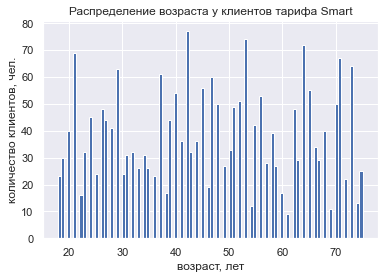

In [130]:
data_all_paid_4_smart['age'].hist(bins=100)
plt.xlabel('возраст, лет')
plt.ylabel('количество клиентов, чел.')
plt.title('Распределение возраста у клиентов тарифа Smart')

По тарифу Ultra

In [131]:
data_all_paid_4_ultra_age_month = data_all_paid_4_ultra.groupby('month').agg(
    age_mean = ('age','mean'))
data_all_paid_4_ultra_age_month = data_all_paid_4_ultra_age_month.sort_values('month', ascending = True)
display(data_all_paid_4_ultra_age_month)

,age_mean
month,
0,51.00
1,46.11
2,45.00
3,45.41
4,47.65
5,47.34
6,47.83
7,47.70
8,47.05


Text(0.5, 1.0, 'Распределение возраста у клиентов тарифа Ultra')

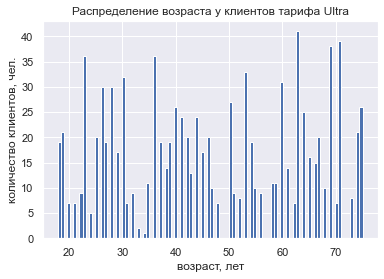

In [132]:
data_all_paid_4_ultra['age'].hist(bins=100)
plt.xlabel('возраст, лет')
plt.ylabel('количество клиентов, чел.')
plt.title('Распределение возраста у клиентов тарифа Ultra')

Не видно особой разницы по возрасту у аудиторий разных тарифов.

3.4. Гистограммы распределения

In [133]:
data_all_paid_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  3216 non-null   int64         
 1   age                      3216 non-null   int64         
 2   churn_date               189 non-null    datetime64[ns]
 3   city                     3216 non-null   object        
 4   first_name               3216 non-null   object        
 5   last_name                3216 non-null   object        
 6   reg_date                 3216 non-null   datetime64[ns]
 7   tariff                   3216 non-null   object        
 8   users_month              3216 non-null   int64         
 9   month                    3216 non-null   int32         
 10  internet_count_id_month  3216 non-null   float64       
 11  internet_sum_id_month    3216 non-null   float64       
 12  messages_count_id_month  3216 non-

Text(0.5, 1.0, 'Распределение количества минут у клиентов тарифа Ultra')

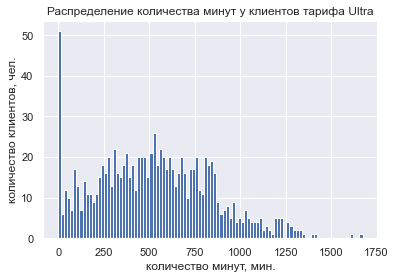

In [134]:
data_all_paid_4_ultra['calls_sum_id_month'].hist(bins=100)
plt.xlabel('количество минут, мин.')
plt.ylabel('количество клиентов, чел.')
plt.title('Распределение количества минут у клиентов тарифа Ultra')
# граница тарифа 3000 минут и до границы никто не дотягивает

Text(0.5, 1.0, 'Распределение количества минут у клиентов тарифа Smart')

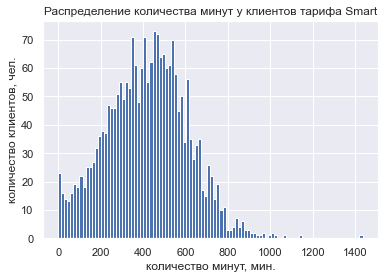

In [135]:
data_all_paid_4_smart['calls_sum_id_month'].hist(bins=100)
plt.xlabel('количество минут, мин.')
plt.ylabel('количество клиентов, чел.')
plt.title('Распределение количества минут у клиентов тарифа Smart')
# граница тарифа 500 минут, пакетных минут не хватает для более, чем 25% клиентов

Text(0.5, 1.0, 'Распределение количества минут у клиентов тарифа Smart и Ultra')

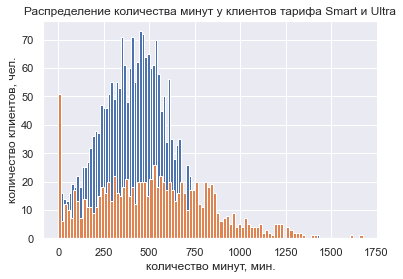

In [136]:
data_all_paid_4_smart['calls_sum_id_month'].hist(bins=100)
data_all_paid_4_ultra['calls_sum_id_month'].hist(bins=100)
plt.xlabel('количество минут, мин.')
plt.ylabel('количество клиентов, чел.')
plt.title('Распределение количества минут у клиентов тарифа Smart и Ultra')
# дисперсия значений явно больше у клиентов Ultra

Text(0.5, 1.0, 'Распределение количества сообщений у клиентов тарифа Ultra')

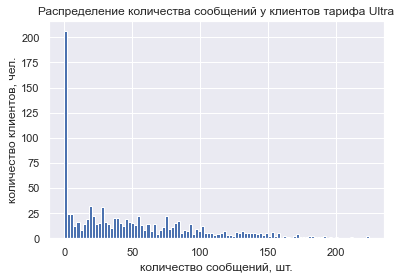

In [137]:
data_all_paid_4_ultra['messages_count_id_month'].hist(bins=100)
plt.xlabel('количество сообщений, шт.')
plt.ylabel('количество клиентов, чел.')
plt.title('Распределение количества сообщений у клиентов тарифа Ultra')
# граница тарифа 1000 сообщений и до границы никто не дотягивает, для 75% клиентов хватает и 79 сообщений в месяц

Text(0.5, 1.0, 'Распределение количества сообщений у клиентов тарифа Smart')

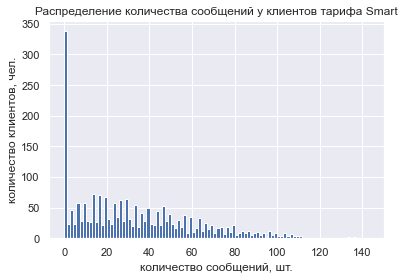

In [138]:
data_all_paid_4_smart['messages_count_id_month'].hist(bins=100)
plt.xlabel('количество сообщений, шт.')
plt.ylabel('количество клиентов, чел.')
plt.title('Распределение количества сообщений у клиентов тарифа Smart')
# граница тарифа 50 сообщений и до границы никто не дотягивает, и этого хватает для 75% клиентов

Text(0.5, 1.0, 'Распределение количества сообщений у клиентов тарифа Ultra')

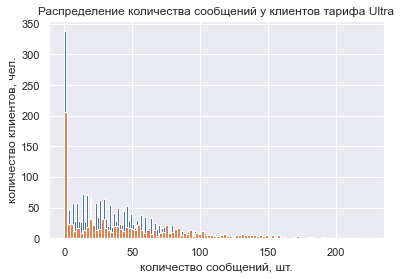

In [139]:
data_all_paid_4_smart['messages_count_id_month'].hist(bins=100)
data_all_paid_4_ultra['messages_count_id_month'].hist(bins=100)
plt.xlabel('количество сообщений, шт.')
plt.ylabel('количество клиентов, чел.')
plt.title('Распределение количества сообщений у клиентов тарифа Ultra')
# по смс картина менее информативная, но и здесь дисперсия значений выше у клиентов тарифа Ultra

Text(0.5, 1.0, 'Распределение интернет-трафика у клиентов тарифа Ultra')

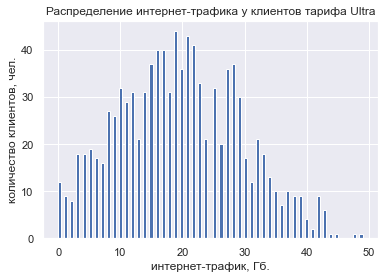

In [140]:
data_all_paid_4_ultra['internet_sum_id_month'].hist(bins=100)
plt.xlabel('интернет-трафик, Гб.')
plt.ylabel('количество клиентов, чел.')
plt.title('Распределение интернет-трафика у клиентов тарифа Ultra')
# граница тарифа 30 Гб и этого хватает примерно для 80% клиентов

Text(0.5, 1.0, 'Распределение интернет-трафика у клиентов тарифа Smart')

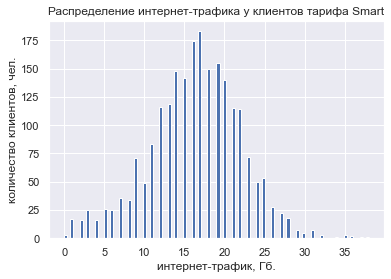

In [141]:
data_all_paid_4_smart['internet_sum_id_month'].hist(bins=100)
plt.xlabel('интернет-трафик, Гб.')
plt.ylabel('количество клиентов, чел.')
plt.title('Распределение интернет-трафика у клиентов тарифа Smart')
# граница тарифа 15 Гб и этого хватает менее, чем для 50% клиентов

Text(0.5, 1.0, 'Распределение интернет-трафика у клиентов тарифа Smart')

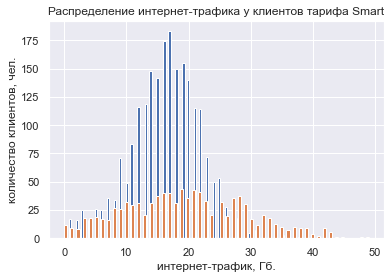

In [142]:
data_all_paid_4_smart['internet_sum_id_month'].hist(bins=100)
data_all_paid_4_ultra['internet_sum_id_month'].hist(bins=100)
plt.xlabel('интернет-трафик, Гб.')
plt.ylabel('количество клиентов, чел.')
plt.title('Распределение интернет-трафика у клиентов тарифа Smart')
# и здесь дисперсия значений больше у клиентов Ultra

In [143]:
data_all_paid_4_ultra = data_all_paid_4.loc[data_all_paid_4['tariff'] == 'ultra']
data_all_paid_4_ultra[['total_payment']].describe([0.75, .80, .85, .875, .9, .95], include=[int, float]).T 

,count,mean,std,min,50%,75%,80%,85%,87.5%,90%,95%,max
total_payment,986.00,2070.03,376.02,1950.00,1950.00,1950.00,1950.00,1950.00,2100.00,2400.00,3000.00,4800.00


Text(0.5, 1.0, 'Распределение общей оплаты у клиентов тарифа Ultra')

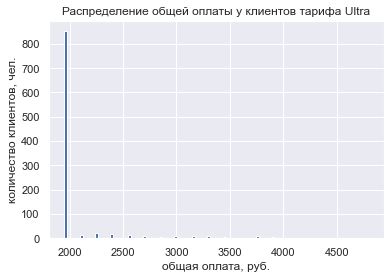

In [144]:
data_all_paid_4_ultra['total_payment'].hist(bins=100)
plt.xlabel('общая оплата, руб.')
plt.ylabel('количество клиентов, чел.')
plt.title('Распределение общей оплаты у клиентов тарифа Ultra')
# базовая стоимость тариа 1950р. и этой суммы хватает для более, чем 85% клиентов

In [145]:
data_all_paid_4_smart = data_all_paid_4.loc[data_all_paid_4['tariff'] == 'smart']
data_all_paid_4_smart[['total_payment']].describe([0.1, .125, .25, .275, .3, .35, .5, .75, .8], include=[int, float]).T 

,count,mean,std,min,10%,12.5%,25%,27.5%,30%,35%,50%,75%,80%,max
total_payment,2230.00,1289.64,818.37,550.00,550.00,550.00,550.00,586.00,627.10,750.00,1021.00,1750.00,1950.00,6770.00


Text(0.5, 1.0, 'Распределение общей оплаты у клиентов тарифа Smart')

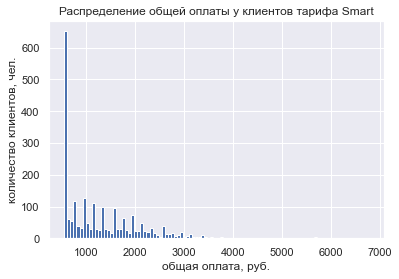

In [146]:
data_all_paid_4_smart['total_payment'].hist(bins=100)
plt.xlabel('общая оплата, руб.')
plt.ylabel('количество клиентов, чел.')
plt.title('Распределение общей оплаты у клиентов тарифа Smart')
# базовая стоимость тарифа 550р. и этой суммы хватает для менее, чем 27,5% клиентов

3.5. Краткие выводы по разделу 3. <br/>
- учитывая бОльшее количество клиентов по тарифу Smart - он привлекательнее для клиентов. Общая сумма дохода оператора по тарифу Smart за этот календарный год - 2875901р., по Ultra - 2041050р.
- если смотреть по календарному году, то наблюдается рост среднего дохода по месяцу от клиентов тарифа Smart. Доход увеличился с 721.32р/мес до 1578.53р/мес, по тарифу Ultra с 1950 до 2138.85. Интересно посмотреть себестоимость процесса, чтобы судить об экономике процессов оператора. Увеличение доходов происходит за счет увеличения потребления интернте-трафика сверх лимитов тарифного плана
- по возрасту клиентов не было обнаружено особой разницы между клиентами двух тарифов
- судя по бОльшему разбросу показателей (дисперсии) по количеству минут телефонных звонков, количеству смс и количеству интернет-трафика клиенты тарифа Ultra гораздо менее думают об ограничивающих условиях своего тарифа, ведут себя более свободно относительно клиентов тарифа Smart
- 20% клиентов тарифа Smart можно порекомендовать переходить на тариф Ultra, он будет для них выгоднее.
- было установлено большое количество интернет-сессий с нулевым трафиком, это может говорить о технологических проблемах сосединения у клиентов оператора, стоит специально исследовать данный вопрос.
- экспоненциального роста клиентов не наблюдается по обоим тарифам.
- есть возможность, если позволяет себестоимость процесса - пересмотреть условия обоих тарифов с целью изменения ограничивающих условий тарифных планов и соответствующего уменьшения стоимости для увеличения ценовой привлекательности для клиентов

In [147]:
#fig,axes = plt.subplots(1,3) #https://russianblogs.com/article/22392189800/
#  
#sns.distplot(x,ax=axes[0])
#   
#sns.distplot(x,hist=False,ax=axes[1])
#  
#sns.distplot(x,kde=False,ax=axes[2])

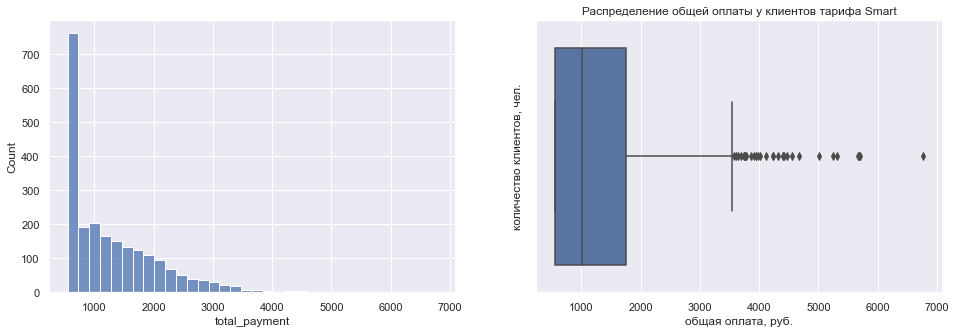

In [148]:
# Создадим одну строку с двумя колонками
import seaborn as sns
sns.set(color_codes=True)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(data_all_paid_4_smart['total_payment'], ax=axes[0]);

#

sns.boxplot(data_all_paid_4_smart['total_payment'], ax=axes[1]);
plt.xlabel('общая оплата, руб.')
plt.ylabel('количество клиентов, чел.')
plt.title('Распределение общей оплаты у клиентов тарифа Smart');
#plt.xlabel('общая оплата, руб.')
#plt.ylabel('количество клиентов, чел.')
#plt.title('Распределение общей оплаты у клиентов тарифа Smart');
#plt.show()
# базовая стоимость тарифа 550р. и этой суммы хватает для менее, чем 27,5% клиентов

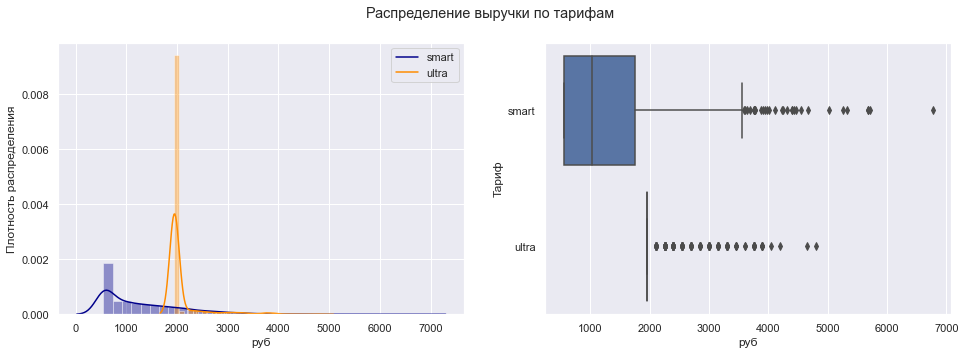

In [149]:
# Создадим одну строку с двумя колонками
#import seaborn as sns        # выставлено вверху
#sns.set(color_codes=True)    # выставлено вверху
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Создадим две гистограммы для разных тарифов. 
# С помощью ax=axes можно контролировать в какой колонке будет отображаться график
sns.distplot(data_all_paid_4_smart['total_payment'], color='darkblue', ax=axes[0])
sns.distplot(data_all_paid_4_ultra['total_payment'], color='darkorange', ax=axes[0])

# Создадим график boxplot для двух тарифов во второй колонке
# Чтобы поменять ориентацию боксплота нужно поменять местами колокнки в x/y
sns.boxplot(data=data_all_paid_4.sort_values(by='tariff'), x='total_payment', y='tariff', ax=axes[1])

# Добавим подписи для каждой колонки 
axes[0].legend(loc='upper right', labels=['smart','ultra'])
axes[0].set_xlabel('руб')
axes[0].set_ylabel('Плотность распределения')
axes[1].set_xlabel('руб')
axes[1].set_ylabel('Тариф')

# Добавим общий заголовок
fig.suptitle('Распределение выручки по тарифам');



 <a name="chapter_4"></a>
**4. Проверка гипотез**<br/>
Необходимо проверить следующие гипотезы:<br/>
средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;<br/>
средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.<br/>
Поясните:<br/>
как вы формулировали нулевую и альтернативную гипотезы;<br/>
какой критерий использовали для проверки гипотез и почему.

4.1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» 

И заодно посчитаем, как соотносятся доходы, полученные оператором по двум тарифам

In [150]:
data_all_paid_4.groupby('tariff').agg(total_payment_mean = (
    'total_payment','mean'), total_payment_median = ('total_payment','median'), total_payment_std = (
    'total_payment','std'), total_payment_sum = ('total_payment','sum'))

,total_payment_mean,total_payment_median,total_payment_std,total_payment_sum
tariff,,,,
smart,1289.64,1021.00,818.37,2875901.00
ultra,2070.03,1950.00,376.02,2041050.00


И заодно посчитали, как соотносятся доходы, полученные оператором по двум тарифам

Ранее выбросы нам не мешали и, наоборот, было интересно на них взглянуть. Но для следующей задачи их надо бы убрать. Уберем все, что превышает 75% квантиль

In [151]:
data_total_payment_var_smart = data_all_paid_4_smart.copy()
#quan_5 = data_total_payment_var_smart['total_payment'].quantile(0.25) # распределение односторонее, вернее имеет жесткую границу
quan_75 = data_total_payment_var_smart['total_payment'].quantile(0.75)
quan_0_75_total_payment_var_smart = (data_total_payment_var_smart['total_payment'] <= quan_75)

data_total_payment_var_smart = data_total_payment_var_smart.loc[quan_0_75_total_payment_var_smart]
data_total_payment_var_smart[['total_payment']].describe()

,total_payment
count,1691.00
mean,910.94
std,384.30
min,550.00
25%,550.00
50%,751.00
75%,1169.50
max,1750.00


In [152]:
data_total_payment_var_ultra = data_all_paid_4_ultra.copy()
#quan_5 = data_total_payment_var_ultra['total_payment'].quantile(0.25) # распределение односторонее, вернее имеет жесткую границу
quan_75 = data_total_payment_var_ultra['total_payment'].quantile(0.75)
quan_0_75_total_payment_var_ultra = (data_total_payment_var_ultra['total_payment'] <= quan_75)
data_total_payment_var_ultra = data_total_payment_var_ultra.loc[quan_0_75_total_payment_var_ultra]
data_total_payment_var_ultra[['total_payment']].describe()

,total_payment
count,852.00
mean,1950.00
std,0.00
min,1950.00
25%,1950.00
50%,1950.00
75%,1950.00
max,1950.00


In [153]:
data_total_payment_var_smart = data_total_payment_var_smart['total_payment']
print(data_total_payment_var_smart)

8      1150.00
9       550.00
10     1150.00
11     1350.00
12      550.00
         ...  
3211   1750.00
3212   1513.00
3213    550.00
3214   1150.00
3215    598.00
Name: total_payment, Length: 1691, dtype: float64


In [154]:
data_total_payment_var_ultra = data_total_payment_var_ultra['total_payment']
print(data_total_payment_var_ultra)

0      1950.00
1      1950.00
2      1950.00
3      1950.00
4      1950.00
         ...  
3173   1950.00
3181   1950.00
3188   1950.00
3190   1950.00
3192   1950.00
Name: total_payment, Length: 852, dtype: float64


Не совсем понятно, какой смысл после этого их сравнивать, но все же...

Формулировка гипотез:
- 0. Средняя выручка клиентов на разных тарифах одинаковая
- 1. Средняя выручка клиентов на разных тарифах отличается

Проверяем гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применяем метод scipy.stats.ttest_ind (array1, array2, equal_var).

In [155]:
alpha = 0.05

In [156]:
results = st.ttest_ind(
    data_total_payment_var_ultra, 
    data_total_payment_var_smart)


print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.0
Отвергаем нулевую гипотезу


Да, средняя выручка на тарифах Smart и Ultra отличается.

4.2. Проверка гипотезы - средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

In [157]:
data_all_paid_4_region = data_all_paid_4.copy()
data_all_paid_4_moscow = data_all_paid_4_region[data_all_paid_4_region['city'] == 'Москва']
data_all_paid_4_moscow = data_all_paid_4_moscow['total_payment']
display(data_all_paid_4_moscow) # проверим


8      1150.00
9       550.00
17     1950.00
18     1950.00
19     1950.00
         ...  
3160   1750.00
3161   1550.00
3162   1750.00
3163    550.00
3164    586.00
Name: total_payment, Length: 611, dtype: float64

In [158]:
data_all_paid_4_region = data_all_paid_4_region[data_all_paid_4_region['city'] != 'Москва']
data_all_paid_4_region = data_all_paid_4_region['total_payment']
display(data_all_paid_4_region) # проверим

0      1950.00
1      1950.00
2      1950.00
3      1950.00
4      1950.00
         ...  
3211   1750.00
3212   1513.00
3213    550.00
3214   1150.00
3215    598.00
Name: total_payment, Length: 2605, dtype: float64

Формулировка гипотез:

- 0. Средняя выручка клиентов из Москвы и в регионах одинаковая
- 1. Средняя выручка клиентов из Москвы и в регионах отличается

Проверяем гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применяем метод scipy.stats.ttest_ind (array1, array2, equal_var).

In [159]:
alpha = 0.05

In [160]:
results = st.ttest_ind(
    data_all_paid_4_moscow, 
    data_all_paid_4_region)


print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


In [161]:
print(data_all_paid_4_moscow.sum() / len(data_all_paid_4_moscow))

1546.7135842880523


In [162]:
print(data_all_paid_4_region.sum() / len(data_all_paid_4_region))

1524.7251439539348


Не смогли отвергнуть нулевую гипотезу. Средняя выручка клиентов из Москвы и из регионов и в самом деле близка.

In [163]:
from scipy.stats import bartlett

stat, p = bartlett(data_all_paid_4_moscow, data_all_paid_4_region)
print(p)

0.024545608086290666


In [164]:
from scipy.stats import levene

stat, p = levene(data_all_paid_4_moscow, data_all_paid_4_region)
print(p)

0.014015266770621706


 <a name="chapter_5"></a>
**5. Выводы**

**5.1.** Первичное рассмотрение начальных датасетов. <br/>
5.1.1. Всего 5 таблиц. Разделители - `,` и одна ощибка с разделителями в таблице internet.csv, что вызвало появление столбца Unnamed: 0. Остальные названия столбцов без пропусков и артефактов.<br/><br/>
5.1.2. Дублирующих строк нет.<br/><br/>
5.1.3. Есть пропуски данных в таблице users.csv столбец churn_date, носят технологический характер.<br/><br/>
5.1.4. Некорректных дат не замечено, значимых выбросов тоже не видно пока.<br/><br/>
5.1.5. Все столбцы с датами надо бы перевести тип данных, более подходящий для работы с временными данными.<br/><br/>
**5.2.** Изучение и предобработка данных<br/>
**users**<br/>
5.2.1. Было исследование распределения возраста у клиентов по разным тарифам, значимого отличия между тарифами в аспекте возраста не обнаружено.<br/><br/>
5.2.2. churn_date и reg_date   приведены к формату datetime64 и отсмотрены на предмет необычных одновременных событий, не обнаружено. Просмотр reg_date показал, что перед нами срез массива только новых клиентов длиной ровно в календарный год (2018), что позволит отдельно отсмотреть сезонность и влияние праздников, типа нового года<br/><br/>
5.2.3. Распределение по городам похоже на стандартное, соответветственно численности населения в городах, по количеству клиентов лидируют города-миллионники, как и положено: Москва - 99 чел., Санкт-Петербург - 39, Новосибирск - 16, Омск - 14, Казань - 14. Нет проблем с названиями городов.<br/><br/>
5.2.4. Распределение клиентов по тарифам: smart -  351 чел., ultra - 149.<br/><br/>
5.2.5. Добавлен столбец users_month и далее отсмотрено, как набирались люди с разными тарифами. У Smarta поток примерно в два раза выше и в месяц набиралось от 19 до 37 клиентов в месяц. У Ultra от 7 до 18.<br/><br/>
**calls**<br/>
5.3.1. call_date  приведен к формату datetime64 и проверено распределение количества звонков по датам. Учитывая, что это только новые клиенты, то распределение с линейным ростом количества по дате вполне штатное. Выброс клдичества звонков в предновогодний день даже меньше, чем я предполагал.<br/><br/>
5.3.2. Распределение количества звонков по юзерам не выявило аномалий.<br/><br/>
5.3.3. Зафиксировано 39613 пропущенных звонков.<br/><br/>
5.3.4. Было посчитано для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам. Введен новый столбец calls_month и израсходованные минуты округляем в верхнюю сторону и переводим в int. Фиксируем довольно линейное возрастание израсходованных минут от 10784 в 01.2018 до 243675 в 12.2018. Удивительно, но средняя продолжительность звонков особо не меняется по месяцам, остается равной примерно 7,15 мин или с учетом звонков с нулевой длительностью - 8,9 мин. <br/><br/>
**messages**<br/>
5.4.1. message_date  формат приведен к datetime64.
5.4.2. Распеределение данных по смс очень похоже на ситуацию по звонкам, равномерный рост в течение года, от 924 в 01.2018 до 20555 в 12.2018. Интересно, что всеми считается, что смс медленно и верно уходят, но количество смс в среднем по месяцу пока всего в 1,3 раза меньше соответствующего количества звонков (без учета звонков с нулевой длительностью).<br/><br/>
**internet**<br/>
5.5.1. Удален столбец 'Unnamed: 0'.<br/><br/>
5.5.2. Надо обратить внимание оператора на большое количество интернет-сессий с нулевым трафиком - 19598 шт., это может свидетельствовать о технических проблемах оператора.<br/><br/>
5.5.3. Распределение количества сессий по дням равноменое и возрастающее, как и распределение количества mb по сессиям. Трафик по месяцу вырос более, чем в 22 раза, до 9133555Гб в 12.2018. Распределение количества сессий по юзерам равномерное. Трафик пересчитан в Гб с округлением вверх.<br/><br/>
**5.6.** Помесячная выручка с каждого пользователя.<br/>
5.6.1. Методом .merge произведено объединение таблиц на основе user_id и month, решены трудности с возникновением проблем в конечной таблице за счет добавления нескольких строк  с нужным месяцем и остальными нулевыми данными в таблицу с интернет-данными. За счет этого далее были использованы все существующие данные. Также были обнаружены два клиента с полностью нулевыми данными, это предновогодние клиенты, которые не воспользовались вообще услугами оператора, одна пробыла всего 8 дней, а второй всего 5 дней. Все остальные недостающие значения в конечной  таблице заменены на нули. <br/><br/>
**5.7 Исследовательский анализ данных**<br/>
5.7.1. Всего в исследовании данные по тарифу smart - 351  и по тарифу ultra - 149 клиентов.<br/><br/>
5.7.2. Тарифы показывают такие показатели в среднем по году для клиента в месяц:<br/>
количество минут сверх плана, smart - 124,76, ultra - 0;<br/>
количество смс сверх плана, smart - 17,39, ultra - 0;<br/>
количество интернет-трафика в Гб, сверх плана, smart - 597,49, ultra - 120,03;<br/>
дополнительная оплата в р. сверх плана, smart - 739,64, ultra - 120,03;<br/>
средняя оплата клиента, smart - 1289,64, ultra - 2070,03.<br/>
Тариф Ultra в целом с каждого клиента приносит больше денег, в среднем больше примерно на 780 р. в месяц. Хотя это ничего не говорит нам с точки зрения рентабельности всего процесса, себестоимости компонент для оператора услуг мы в этом проекте не знаем.<br/>
Отметим, что клиенты ultra не имеют дополнительной платы по звонкам и смс, стало быть тариф можно немного подкорректировать. Уменьшить его цену, но и несколько снизить количество минут и смс в тарифном пакете. Без понимания рентабельности сложно что-то конкретно сказать, но такая возможность есть.<br/>
И видим более, чем двойное превышение средней суммы за месяц по тарифу Smart по сравнению со стоимостью пакета в 550р.<br/><br/>
5.7.3. Сезонность и изменение экономики по месяцам.<br/>
Раз у нас есть ровно календарный год, были отсмотрены средние цифры по тарифам по каждому месяцу отдельно, оценим сезонность и судьбу тарифов в течении календарного года.<br/>
По Ultra наблюдаем рост средней оплаты клиента в месяц с 1950р. в 01.2018 до 2138,85р.<br/>
По тарифу Smart наблюдаем рост средней оплаты клиента в месяц с 550р. в 01.2018 до 1578,53р.<br/>
Глядя на такую разную судьбу средней суммы получаемой в месяц с клиента, очень интересно вспомнить - какими темпами росла клиентская база по каждому тарифному плану. Достаточно линейно. Стало быть сами тарифы работали достаточно равномерно и выбирали свою аудиторию без экспоненциального роста.<br/><br/>
5.7.4. Не видно особой разницы по возрасту у аудиторий разных тарифов.<br/><br/>
5.7.5. Гистограммы распределения:<br/>
количество минут, тариф ultra, граница тарифа 3000 минут и до границы никто не дотягивает;<br/>
количество минут, тариф smart, граница тарифа 500 минут, пакетных минут не хватает для более, чем 25% клиентов;<br/>
дисперсия значений явно больше у клиентов Ultra.<br/><br/>
количество сообщений, тариф ultra, граница тарифа 1000 сообщений и до границы никто не дотягивает, для 75% клиентов хватает и 79 сообщений в месяц;<br/>
количество сообщений, тариф smart, граница тарифа 50 сообщений и до границы никто не дотягивает, и этого хватает для 75% клиентов;<br/>
по смс картина менее информативная, но и здесь дисперсия значений выше у клиентов тарифа Ultra;<br/><br/>
количество интернет-трафика, тариф ultra, граница тарифа 30 Гб и этого хватает примерно для 80% клиентов;<br/>
количество интернет-трафика, тариф smart, граница тарифа 15 Гб и этого хватает менее, чем для 50% клиентов;<br/>
и здесь дисперсия значений больше у клиентов Ultra.<br/><br/>
общая оплата, тариф ultra, базовая стоимость тариа 1950р. и этой суммы хватает для более, чем 85% клиентов;<br/>
общая оплата, тариф smart, базовая стоимость тарифа 550р. и этой суммы хватает для менее, чем 27,5% клиентов.<br/><br/>
5.7.6. Учитывая бОльшее количество клиентов по тарифу Smart он привлекательнее для клиентов. Общая сумма дохода оператора по тарифу Smart за этот календарный год - 2875901р., по Ultra - 2041050р.<br/><br/>
5.7.7. Если смотреть по календарному году, то наблюдается рост среднего дохода по месяцу от клиентов тарифа Smart. Доход увеличился с 721.32р/мес до 1578.53р/мес, по тарифу Ultra с 1950 до 2138.85. Интересно посмотреть себестоимость процесса, чтобы судить об экономике процессов оператора. Увеличение доходов происходит за счет увеличения потребления интернте-трафика сверх лимитов тарифного плана.<br/><br/>
5.7.8. Cудя по бОльшему разбросу показателей (дисперсии) по количеству минут телефонных звонков, количеству смс и количеству интернет-трафика клиенты тарифа Ultra гораздо менее думают об ограничивающих условиях своего тарифа, ведут себя более свободно относительно клиентов тарифа Smart.<br/><br/>
5.7.9. 20% клиентов тарифа Smart можно порекомендовать переходить на тариф Ultra, он будет для них выгоднее.
5.7.10. Экспоненциального роста клиентов не наблюдается по обоим тарифам.<br/><br/>
5.7.11. Есть возможность, если позволяет себестоимость процесса - пересмотреть условия обоих тарифов с целью изменения ограничивающих условий тарифных планов и соответствующего уменьшения стоимости для увеличения ценовой привлекательности для клиентов.<br/><br/>
**5.8. Проверка гипотез**<br/>
5.8.1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт»:
проверена гипотеза о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применен метод scipy.stats.ttest_ind (array1, array2, equal_var).<br/>
Отвергнута нулевая гипотеза, средняя выручка на тарифах Smart и Ultra отличается.<br/><br/>
5.8.2. Проверка гипотезы - средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов:
проверена гипотеза о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применен метод scipy.stats.ttest_ind (array1, array2, equal_var).<br/>
p-значение: 0.5400751614511182<br/>
Не получилось отвергнуть нулевую гипотезу, средняя выручка в месяц клиентов из Москвы и из регионов и в самом деле близка, 1546 и 1524, соответственно.
